### Load packages & data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 인식
plt.rc('axes', unicode_minus = False)   # 음수 표기

## **1. 데이터 기본 전처리**

In [ ]:
# 15년도부터 19년도까지의 퇴원손상심층조사 데이터 이용
data15 = pd.read_sas("./data/nhds15.sas7bdat", format = "sas7bdat")
data16 = pd.read_sas("./data/nhds16.sas7bdat", format = "sas7bdat")
data17 = pd.read_sas("./data/nhds17.sas7bdat", format = "sas7bdat")
data18 = pd.read_sas("./data/nhds18.sas7bdat", format = "sas7bdat")
data19 = pd.read_sas("./data/nhds19.sas7bdat", format = "sas7bdat")

In [ ]:
print(data15.shape)
print(data16.shape)
print(data17.shape)
print(data18.shape)
print(data19.shape)

(224061, 69)
(227615, 69)
(235579, 69)
(291771, 69)
(302580, 70)


In [ ]:
data15.isnull().sum()[:11]

NUM        0
HIDENT     0
SEX        0
AGE        0
BDATE      0
ZIP        0
PAYSOU     0
ADMDATE    0
DISDATE    0
ADMROU     0
PRIDIA     0
dtype: int64

In [ ]:
data16.isnull().sum()[:11]

NUM        0
HIDENT     0
SEX        0
AGE        0
BDATE      0
ZIP        0
PAYSOU     0
ADMDATE    0
DISDATE    0
ADMROU     0
PRIDIA     0
dtype: int64

In [ ]:
data17.isnull().sum()[:11]

NUM        0
HIDENT     0
SEX        0
AGE        0
BDATE      0
ZIP        1
PAYSOU     0
ADMDATE    0
DISDATE    0
ADMROU     0
PRIDIA     0
dtype: int64

In [ ]:
data18.isnull().sum()[:11]

NUM        0
HIDENT     0
SEX        0
AGE        0
BDATE      0
ZIP        1
PAYSOU     0
ADMDATE    0
DISDATE    0
ADMROU     0
PRIDIA     0
dtype: int64

In [ ]:
data19.isnull().sum()[:11]

NUM        0
HIDENT     0
SEX        0
AGE        0
BDATE      0
ZIP        0
PAYSOU     0
ADMDATE    0
DISDATE    0
ADMROU     0
PRIDIA     5
dtype: int64

In [ ]:
data18.head()

,NUM,HIDENT,SEX,AGE,BDATE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,...,INJPLA,INJACT,INJMEC,INJDATE,TRAMODE,SUIFAC,POISUB,AREA,BED,WEIGHT
0,1.0,b'A1',b'2',-0.0,b'20161214',b'08096',b'1',b'20161214',b'20170101',b'8',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',9.7061
1,2.0,b'A1',b'2',-0.0,b'20170103',b'100450',b'1',b'20170103',b'20170103',b'8',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',9.7061
2,3.0,b'A1',b'2',0.0,b'20161224',b'02714',b'1',b'20170105',b'20170107',b'1',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',9.7061
3,4.0,b'A1',b'2',0.0,b'20160326',b'01418',b'1',b'20170110',b'20170112',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',9.7061
4,5.0,b'A1',b'2',0.0,b'20160523',b'21970',b'1',b'20170117',b'20170117',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',9.7061


In [ ]:
data19.head()

,NUM,HIDENT,SEX,AGE,BDATE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,...,INJACT,INJMEC,INJDATE,TRAMODE,SUIFAC,POISUB,ALCO,AREA,BED,WEIGHT
0,1.0,b'A1',b'2',0.0,b'20170816',b'21986',b'1',b'20171227',b'20180101',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
1,2.0,b'A1',b'2',0.0,b'20171110',b'02827',b'1',b'20171230',b'20180104',b'1',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
2,3.0,b'A1',b'2',0.0,b'20171113',b'11449',b'1',b'20180105',b'20180108',b'1',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
3,4.0,b'A1',b'2',0.0,b'20170706',b'02623',b'1',b'20171018',b'20180113',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
4,5.0,b'A1',b'2',0.0,b'20171023',b'03918',b'1',b'20180111',b'20180117',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953


#### 19년도 데이터에만 있는 ALCO 변수 -> 사용 x

In [ ]:
data19 = data19.drop('ALCO', axis=1)
data19.head()

,NUM,HIDENT,SEX,AGE,BDATE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,...,INJPLA,INJACT,INJMEC,INJDATE,TRAMODE,SUIFAC,POISUB,AREA,BED,WEIGHT
0,1.0,b'A1',b'2',0.0,b'20170816',b'21986',b'1',b'20171227',b'20180101',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
1,2.0,b'A1',b'2',0.0,b'20171110',b'02827',b'1',b'20171230',b'20180104',b'1',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
2,3.0,b'A1',b'2',0.0,b'20171113',b'11449',b'1',b'20180105',b'20180108',b'1',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
3,4.0,b'A1',b'2',0.0,b'20170706',b'02623',b'1',b'20171018',b'20180113',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953
4,5.0,b'A1',b'2',0.0,b'20171023',b'03918',b'1',b'20180111',b'20180117',b'2',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'11',b'4',10.196953


#### 데이터 병합
- 년도별 데이터에 해당 년도의 정보를 담은 'YEAR' 변수 생성 (나중에 train/test 나눌 때 이용?)
- 모든 데이터 병합

In [ ]:
data15['YEAR'] = 2015
data16['YEAR'] = 2016
data17['YEAR'] = 2017
data18['YEAR'] = 2018
data19['YEAR'] = 2019
data = pd.concat([data15, data16, data17, data18, data19], axis=0)
data.shape

(1281606, 70)

#### 주진단코드(PRIDIA) 자료형 변환 후 손상(S, T)에 해당하는 행만 추출
- 주진단코드가 nan인 행 제거
- 주진단코드 자료형 변환
- S, T만 추출

In [ ]:
#data = data.loc[data['PRIDIA'].isnull()==False].reset_index(drop=True)
#data['PRIDIA'] = [data['PRIDIA'][i].decode('utf-8') for i in range(len(data))]
injidx = ['S' in i or 'T' in i for i in data['PRIDIA']]
injury = data.loc[injidx].reset_index(drop=True)
injury

,NUM,HIDENT,SEX,AGE,BDATE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,...,INJACT,INJMEC,INJDATE,TRAMODE,SUIFAC,POISUB,AREA,BED,WEIGHT,YEAR
0,14.0,b'A1',b'2',76.0,b'19370925',b'420824',b'1',b'20140617',b'20140625',b'2',...,b'5',b'2',b'20140614',NaN,NaN,NaN,b'31',b'3',23.075116,2015
1,18.0,b'A1',b'2',66.0,b'19470622',b'420832',b'5',b'20140401',b'20140411',b'1',...,b'5',b'0',b'20140401',b'1',NaN,NaN,b'31',b'3',23.075116,2015
2,26.0,b'A1',b'2',63.0,b'19500807',b'422841',b'1',b'20140623',b'20140702',b'2',...,b'5',b'0',b'20140401',b'99',NaN,NaN,b'31',b'3',23.075116,2015
3,31.0,b'A1',b'2',82.0,b'19320205',b'152793',b'1',b'20141025',b'20141112',b'1',...,b'6',b'2',b'20141025',NaN,NaN,NaN,b'31',b'3',23.075116,2015
4,53.0,b'A1',b'1',8.0,b'20060523',b'422760',b'1',b'20140807',b'20140809',b'2',...,b'6',b'2',b'20140801',NaN,NaN,NaN,b'31',b'3',23.075116,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149228,302557.0,b'Z7',b'2',62.0,b'19560223',b'50970',b'1',b'20180228',b'20180317',b'2',...,b'99',b'2',b'20180228',NaN,NaN,NaN,b'38',b'1',54.577826,2019
149229,302560.0,b'Z7',b'2',56.0,b'19610820',b'50951',b'1',b'20180212',b'20180221',b'2',...,b'99',b'2',b'20180117',NaN,NaN,NaN,b'38',b'1',54.577826,2019
149230,302561.0,b'Z7',b'2',55.0,b'19630302',b'621874',b'2',b'20181008',b'20181015',b'2',...,b'99',b'2',b'20180930',NaN,NaN,NaN,b'38',b'1',54.577826,2019
149231,302575.0,b'Z7',b'1',39.0,b'19790131',b'50966',b'1',b'20180910',b'20180915',b'2',...,b'2',b'3',b'20180910',NaN,NaN,NaN,b'38',b'1',54.577826,2019


In [ ]:
## S 개수
len(injury.loc[['S' in p for p in injury['PRIDIA']]])

127698

In [ ]:
## T 개수
len(injury.loc[['T' in p for p in injury['PRIDIA']]])

21535

#### 분석에 사용하지 않을 변수 제거
: NUM, HIDENT, BDATE, DEATHCA, TRAMODE,SUIFAC, POISUB, PRODATE, WEIGHT

In [ ]:
injury = injury.drop(['NUM', 'HIDENT', 'BDATE', 'DEATHCA', 'TRAMODE', 'SUIFAC', 'POISUB', 'PRODATE', 'WEIGHT'], axis=1)
injury.shape

(149233, 61)

#### na값 처리

In [ ]:
injury.isnull().sum()[:8]

SEX        0
AGE        0
ZIP        0
PAYSOU     0
ADMDATE    0
DISDATE    0
ADMROU     0
PRIDIA     0
dtype: int64

In [ ]:
injury.isnull().sum()[28:31]

INJDIA1        58
INJDIA2    147290
PRIPRO      81232
dtype: int64

In [ ]:
injury.isnull().sum()[31:51]

ADDPRO1      73002
ADDPRO2     104910
ADDPRO3     124781
ADDPRO4     135255
ADDPRO5     140672
ADDPRO6     143706
ADDPRO7     145566
ADDPRO8     146700
ADDPRO9     147440
ADDPRO10    147916
ADDPRO11    148305
ADDPRO12    148538
ADDPRO13    148690
ADDPRO14    148797
ADDPRO15    148906
ADDPRO16    148985
ADDPRO17    149041
ADDPRO18    149087
ADDPRO19    149122
ADDPRO20    149176
dtype: int64

In [ ]:
injury.isnull().sum()[51:]

TXRES          0
DISPO          0
INJINT     10231
INJPLA     10232
INJACT     10231
INJMEC     10231
INJDATE    10231
AREA           0
BED            0
YEAR           0
dtype: int64

- INJUNT, INJPLA, INJACT, INJMEC, INJDATE       
    ->na인 행은 삭제

In [ ]:
nans = injury.loc[injury['INJACT'].isnull()==True]['PRIDIA']
print('S에 해당하는 nan값 개수:{}'.format(sum(['S' in p for p in nans])))
print('T에 해당하는 nan값 개수:{}'.format(sum(['T' in p for p in nans])))

S에 해당하는 nan값 개수:0
T에 해당하는 nan값 개수:10231


In [ ]:
pd.set_option('display.max_rows', 20)
dropidx = injury['INJPLA'].isnull()==False
injury = injury.loc[dropidx].reset_index(drop=True)
injury.shape

(139001, 61)

In [ ]:
injury.isnull().sum()[28:31]

INJDIA1         0
INJDIA2    137187
PRIPRO      75244
dtype: int64

-> INJDIA1 null값도 해결!

In [ ]:
injury.isnull().sum()[51:]

TXRES      0
DISPO      0
INJINT     0
INJPLA     0
INJACT     0
INJMEC     0
INJDATE    0
AREA       0
BED        0
YEAR       0
dtype: int64

- PRIPRO(주수술코드)          
수술 했으면(na값이 아니면) 1, 안했으면(na값이면) 0으로 변환해서 수술 여부 변수로 변환

In [ ]:
dropidx = injury['PRIPRO'].isnull()
injury['PRIPRO'] = [1 if dropidx[i]==False else 0 for i in range(len(injury))]

- ADDDIA(부진단코드), ADDPRO(부수술 및 처치코드)          
    - 부진단코드: 부진단 중증도 보정 파생변수 생성(ECM)             
    환자가 가지고 있는 질환 중 주진단 질환이 아닌 질환을 뜻하는 동반질환 -> 부진당 중증도 변수 생성(17개 질환을 바탕으로 한 CCI와 30개 질환을 바탕으로 한 ECM)
    - 부진단과 부수술의 개수를 각각 count하여 하나의 변수로 변환

In [ ]:
for col in tqdm(injury.iloc[:, 8:28].columns):
    naidx = injury[col].isnull()
    injury[col] = [injury[col][i].decode('utf-8') if naidx[i]==False else 'no' for i in range(len(injury))]
injury.iloc[:, 8:28]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]


,ADDDIA1,ADDDIA2,ADDDIA3,ADDDIA4,ADDDIA5,ADDDIA6,ADDDIA7,ADDDIA8,ADDDIA9,ADDDIA10,ADDDIA11,ADDDIA12,ADDDIA13,ADDDIA14,ADDDIA15,ADDDIA16,ADDDIA17,ADDDIA18,ADDDIA19,ADDDIA20
0,E119,M8199,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,E119,I109,I2088,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,M754,M2581,R730,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,F059,N178,N189,M8199,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,T814,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138996,M8199,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
138997,S22070,K297,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
138998,G819,G4090,K769,R945,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
138999,S810,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [ ]:
# CCI 질환별 코드
cci1 = ['I210', 'I211', 'I212', 'I213', 'I214', 'I215', 'I216', 'I217', 'I218', 'I219', 
 'I220', 'I221', 'I222', 'I223', 'I224', 'I225', 'I226', 'I227', 'I228', 'I229', 
 'I250', 'I251', 'I252', 'I253', 'I254', 'I255', 'I256', 'I257', 'I258', 'I259']

cci2 = ['I099', 'I110', 'I130', 'I132', 'I255', 'I420', 'I425', 'I426', 'I427', 'I428', 'I429', 
 'I430', 'I431', 'I432', 'I433', 'I434', 'I435', 'I436', 'I437', 'I438', 'I439',
 'I500', 'I501', 'I502', 'I503', 'I504', 'I505', 'I506', 'I507', 'I508', 'I509', 'P290']

cci3 = ['I700', 'I701', 'I702', 'I703', 'I704', 'I705', 'I706', 'I707', 'I708', 'I709',
 'I710', 'I711', 'I712', 'I713', 'I714', 'I715', 'I716', 'I717', 'I718', 'I719',
 'I731', 'I738', 'I739', 'I771', 'I790', 'I792', 'K551', 'K558', 'K559', 'Z958', 'Z959']

cci4 = ['G450', 'G451', 'G452', 'G453', 'G454', 'G455', 'G456', 'G457', 'G458', 'G459',
 'G460', 'G461', 'G462', 'G463', 'G464', 'G465', 'G466', 'G467', 'G468', 'G469',
 'H340',
 'I600', 'I601', 'I602', 'I603', 'I604', 'I605', 'I606', 'I607', 'I608', 'I609',
 'I610', 'I611', 'I612', 'I613', 'I614', 'I615', 'I616', 'I617', 'I618', 'I619',
 'I620', 'I621', 'I622', 'I623', 'I624', 'I625', 'I626', 'I627', 'I628', 'I629',
 'I630', 'I631', 'I632', 'I633', 'I634', 'I635', 'I636', 'I637', 'I638', 'I639',
 'I640', 'I641', 'I642', 'I643', 'I644', 'I645', 'I646', 'I647', 'I648', 'I649',
 'I650', 'I651', 'I652', 'I653', 'I654', 'I655', 'I656', 'I657', 'I658', 'I659',
 'I660', 'I661', 'I662', 'I663', 'I664', 'I665', 'I666', 'I667', 'I668', 'I669',
 'I670', 'I671', 'I672', 'I673', 'I674', 'I675', 'I676', 'I677', 'I678', 'I679',
 'I680', 'I681', 'I682', 'I683', 'I684', 'I685', 'I686', 'I687', 'I688', 'I689',
 'I690', 'I691', 'I692', 'I693', 'I694', 'I695', 'I696', 'I697', 'I698', 'I699']
 
cci5 =  ['F000', 'F001', 'F002', 'F003', 'F004', 'F005', 'F006', 'F007', 'F008', 'F009',
 'F010', 'F011', 'F012', 'F013', 'F014', 'F015', 'F016', 'F017', 'F018', 'F019',
 'F020', 'F021', 'F022', 'F023', 'F024', 'F025', 'F026', 'F027', 'F028', 'F029',
 'F030', 'F031', 'F032', 'F033', 'F034', 'F035', 'F036', 'F037', 'F038', 'F039',
 'F051', 
 'G300', 'G301', 'G302', 'G303', 'G304', 'G305', 'G306', 'G307', 'G308', 'G309',
 'G311']
cci6 = ['I278', 'I279',
       'J400', 'J401', 'J402', 'J403', 'J404', 'J405', 'J406', 'J407', 'J408', 'J409',
       'J410', 'J411', 'J412', 'J413', 'J414', 'J415', 'J416', 'J417', 'J418', 'J419',
       'J420', 'J421', 'J422', 'J423', 'J424', 'J425', 'J426', 'J427', 'J428', 'J429',
       'J430', 'J431', 'J432', 'J433', 'J434', 'J435', 'J436', 'J437', 'J438', 'J439',
       'J440', 'J441', 'J442', 'J443', 'J444', 'J445', 'J446', 'J447', 'J448', 'J449',
       'J450', 'J451', 'J452', 'J453', 'J454', 'J455', 'J456', 'J457', 'J458', 'J459',
       'J460', 'J461', 'J462', 'J463', 'J464', 'J465', 'J466', 'J467', 'J468', 'J469',
       'J470', 'J471', 'J472', 'J473', 'J474', 'J475', 'J476', 'J477', 'J478', 'J479',
       'J600', 'J601', 'J602', 'J603', 'J604', 'J605', 'J606', 'J607', 'J608', 'J609',
       'J610', 'J611', 'J612', 'J613', 'J614', 'J615', 'J616', 'J617', 'J618', 'J619',
       'J620', 'J621', 'J622', 'J623', 'J624', 'J625', 'J626', 'J627', 'J628', 'J629',
       'J630', 'J631', 'J632', 'J633', 'J634', 'J635', 'J636', 'J637', 'J638', 'J639',
       'J640', 'J641', 'J642', 'J643', 'J644', 'J645', 'J646', 'J647', 'J648', 'J649',
       'J650', 'J651', 'J652', 'J653', 'J654', 'J655', 'J656', 'J657', 'J658', 'J659',
       'J660', 'J661', 'J662', 'J663', 'J664', 'J665', 'J666', 'J667', 'J668', 'J669',
       'J670', 'J671', 'J672', 'J673', 'J674', 'J675', 'J676', 'J677', 'J678', 'J679',
       'J684', 'J701', 'J703'
       ]
cci7 = ['M050', 'M051', 'M052', 'M053', 'M054', 'M055', 'M056', 'M057', 'M058', 'M059',
        'M060', 'M061', 'M062', 'M063', 'M064', 'M065', 'M066', 'M067', 'M068', 'M069',
        'M315', 
        'M320', 'M321', 'M322', 'M323', 'M324', 'M325', 'M326', 'M327', 'M328', 'M329',
       'M330', 'M331', 'M332', 'M333', 'M334', 'M335', 'M336', 'M337', 'M338', 'M339',
       'M340', 'M341', 'M342', 'M343', 'M344', 'M345', 'M346', 'M347', 'M348', 'M349',
        'M351', 'M353', 'M360'
       ]
cci8 = ['K250', 'K251', 'K252', 'K253', 'K254', 'K255', 'K256', 'K257', 'K258', 'K259',
       'K260', 'K261', 'K262', 'K263', 'K264', 'K265', 'K266', 'K267', 'K268', 'K269',
       'K270', 'K271', 'K272', 'K273', 'K274', 'K275', 'K276', 'K277', 'K278', 'K279',
       'K280', 'K281', 'K282', 'K283', 'K284', 'K285', 'K286', 'K287', 'K288', 'K289']
cci9=['B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189',
      'K700', 'K701', 'K702', 'K703', 'K709', 'K713', 'K714', 'K715', 'K717',
      'K730', 'K731', 'K732', 'K733', 'K734', 'K735', 'K736', 'K737', 'K738', 'K739',
      'K740', 'K741', 'K742', 'K743', 'K744', 'K745', 'K746', 'K747', 'K748', 'K749',
      'K760', 'K762', 'K763', 'K764', 'K768', 'K769', 'Z944'
     ]
cci10=['E100', 'E101', 'E106', 'E108', 'E109', 'E110', 'E111', 'E116', 'E118', 'E119',
      'E120', 'E121', 'E126', 'E128', 'E129', 'E130', 'E131', 'E136', 'E138', 'E139',
       'E140', 'E141', 'E146', 'E148', 'E149'
      ]
cci11=['E102', 'E103', 'E104', 'E105', 'E107', 'E112', 'E113', 'E114', 'E115', 'E117',
      'E122', 'E123', 'E124', 'E125', 'E127', 'E132', 'E133', 'E134', 'E135', 'E137',
      'E142', 'E143', 'E144', 'E145', 'E147']
cci12=['G041','G114','G801','G802',
       'G810','G811','G812','G813','G814','G815','G816','G817','G818','G819',
       'G820','G821','G822','G823','G824','G825','G826','G827','G828','G829',
       'G830','G831','G832','G833','G834','G839']

cci13=['I120','I131','N032','N033','N034','N035','N036','N037',
       'N052','N053','N054','N055','N056','N057',
       'N180','N181','N182','N183','N184','N185','N186','N187','N188','N189',
       'N190','N191','N192','N193','N194','N195','N196','N197','N198','N199',
       'N250','Z490','Z491','Z492','Z940','Z992']

cci14=['C000', 'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009',
 'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018', 'C019',
 'C020', 'C021', 'C022', 'C023', 'C024', 'C025', 'C026', 'C027', 'C028', 'C029',
 'C030', 'C031', 'C032', 'C033', 'C034', 'C035', 'C036', 'C037', 'C038', 'C039',
 'C040', 'C041', 'C042', 'C043', 'C044', 'C045', 'C046', 'C047', 'C048', 'C049',
 'C050', 'C051', 'C052', 'C053', 'C054', 'C055', 'C056', 'C057', 'C058', 'C059',
 'C060', 'C061', 'C062', 'C063', 'C064', 'C065', 'C066', 'C067', 'C068', 'C069',
 'C070', 'C071', 'C072', 'C073', 'C074', 'C075', 'C076', 'C077', 'C078', 'C079',
 'C080', 'C081', 'C082', 'C083', 'C084', 'C085', 'C086', 'C087', 'C088', 'C089',
 'C090', 'C091', 'C092', 'C093', 'C094', 'C095', 'C096', 'C097', 'C098', 'C099',
 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109',
 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119',
 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129',
 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139',
 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149',
 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159',
 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169',
 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179',
 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189',
 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199',
 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C206', 'C207', 'C208', 'C209',
 'C210', 'C211', 'C212', 'C213', 'C214', 'C215', 'C216', 'C217', 'C218', 'C219',
 'C220', 'C221', 'C222', 'C223', 'C224', 'C225', 'C226', 'C227', 'C228', 'C229',
 'C230', 'C231', 'C232', 'C233', 'C234', 'C235', 'C236', 'C237', 'C238', 'C239',
 'C240', 'C241', 'C242', 'C243', 'C244', 'C245', 'C246', 'C247', 'C248', 'C249',
 'C250', 'C251', 'C252', 'C253', 'C254', 'C255', 'C256', 'C257', 'C258', 'C259',
 'C260', 'C261', 'C262', 'C263', 'C264', 'C265', 'C266', 'C267', 'C268', 'C269',
 'C300', 'C301', 'C302', 'C303', 'C304', 'C305', 'C306', 'C307', 'C308', 'C309',
 'C310', 'C311', 'C312', 'C313', 'C314', 'C315', 'C316', 'C317', 'C318', 'C319',
 'C320', 'C321', 'C322', 'C323', 'C324', 'C325', 'C326', 'C327', 'C328', 'C329',
 'C330', 'C331', 'C332', 'C333', 'C334', 'C335', 'C336', 'C337', 'C338', 'C339',
 'C340', 'C341', 'C342', 'C343', 'C344', 'C345', 'C346', 'C347', 'C348', 'C349',
 'C370', 'C371', 'C372', 'C373', 'C374', 'C375', 'C376', 'C377', 'C378', 'C379',
 'C380', 'C381', 'C382', 'C383', 'C384', 'C385', 'C386', 'C387', 'C388', 'C389',
 'C390', 'C391', 'C392', 'C393', 'C394', 'C395', 'C396', 'C397', 'C398', 'C399',
 'C400', 'C401', 'C402', 'C403', 'C404', 'C405', 'C406', 'C407', 'C408', 'C409',
 'C410', 'C411', 'C412', 'C413', 'C414', 'C415', 'C416', 'C417', 'C418', 'C419',
 'C430', 'C431', 'C432', 'C433', 'C434', 'C435', 'C436', 'C437', 'C438', 'C439',
 'C450', 'C451', 'C452', 'C453', 'C454', 'C455', 'C456', 'C457', 'C458', 'C459',
 'C460', 'C461', 'C462', 'C463', 'C464', 'C465', 'C466', 'C467', 'C468', 'C469',
 'C470', 'C471', 'C472', 'C473', 'C474', 'C475', 'C476', 'C477', 'C478', 'C479',
 'C480', 'C481', 'C482', 'C483', 'C484', 'C485', 'C486', 'C487', 'C488', 'C489',
 'C490', 'C491', 'C492', 'C493', 'C494', 'C495', 'C496', 'C497', 'C498', 'C499',
 'C500', 'C501', 'C502', 'C503', 'C504', 'C505', 'C506', 'C507', 'C508', 'C509',
 'C510', 'C511', 'C512', 'C513', 'C514', 'C515', 'C516', 'C517', 'C518', 'C519',
 'C520', 'C521', 'C522', 'C523', 'C524', 'C525', 'C526', 'C527', 'C528', 'C529',
 'C530', 'C531', 'C532', 'C533', 'C534', 'C535', 'C536', 'C537', 'C538', 'C539',
 'C540', 'C541', 'C542', 'C543', 'C544', 'C545', 'C546', 'C547', 'C548', 'C549',
 'C550', 'C551', 'C552', 'C553', 'C554', 'C555', 'C556', 'C557', 'C558', 'C559',
 'C560', 'C561', 'C562', 'C563', 'C564', 'C565', 'C566', 'C567', 'C568', 'C569',
 'C570', 'C571', 'C572', 'C573', 'C574', 'C575', 'C576', 'C577', 'C578', 'C579',
 'C580', 'C581', 'C582', 'C583', 'C584', 'C585', 'C586', 'C587', 'C588', 'C589',
 'C600', 'C601', 'C602', 'C603', 'C604', 'C605', 'C606', 'C607', 'C608', 'C609',
 'C610', 'C611', 'C612', 'C613', 'C614', 'C615', 'C616', 'C617', 'C618', 'C619',
 'C620', 'C621', 'C622', 'C623', 'C624', 'C625', 'C626', 'C627', 'C628', 'C629',
 'C630', 'C631', 'C632', 'C633', 'C634', 'C635', 'C636', 'C637', 'C638', 'C639',
 'C640', 'C641', 'C642', 'C643', 'C644', 'C645', 'C646', 'C647', 'C648', 'C649',
 'C650', 'C651', 'C652', 'C653', 'C654', 'C655', 'C656', 'C657', 'C658', 'C659',
 'C660', 'C661', 'C662', 'C663', 'C664', 'C665', 'C666', 'C667', 'C668', 'C669',
 'C670', 'C671', 'C672', 'C673', 'C674', 'C675', 'C676', 'C677', 'C678', 'C679',
 'C680', 'C681', 'C682', 'C683', 'C684', 'C685', 'C686', 'C687', 'C688', 'C689',
 'C690', 'C691', 'C692', 'C693', 'C694', 'C695', 'C696', 'C697', 'C698', 'C699',
 'C700', 'C701', 'C702', 'C703', 'C704', 'C705', 'C706', 'C707', 'C708', 'C709',
 'C710', 'C711', 'C712', 'C713', 'C714', 'C715', 'C716', 'C717', 'C718', 'C719',
 'C720', 'C721', 'C722', 'C723', 'C724', 'C725', 'C726', 'C727', 'C728', 'C729',
 'C730', 'C731', 'C732', 'C733', 'C734', 'C735', 'C736', 'C737', 'C738', 'C739',
 'C740', 'C741', 'C742', 'C743', 'C744', 'C745', 'C746', 'C747', 'C748', 'C749',
 'C750', 'C751', 'C752', 'C753', 'C754', 'C755', 'C756', 'C757', 'C758', 'C759',
 'C760', 'C761', 'C762', 'C763', 'C764', 'C765', 'C766', 'C767', 'C768', 'C769',
 'C810', 'C811', 'C812', 'C813', 'C814', 'C815', 'C816', 'C817', 'C818', 'C819',
 'C820', 'C821', 'C822', 'C823', 'C824', 'C825', 'C826', 'C827', 'C828', 'C829',
 'C830', 'C831', 'C832', 'C833', 'C834', 'C835', 'C836', 'C837', 'C838', 'C839',
 'C840', 'C841', 'C842', 'C843', 'C844', 'C845', 'C846', 'C847', 'C848', 'C849',
 'C850', 'C851', 'C852', 'C853', 'C854', 'C855', 'C856', 'C857', 'C858', 'C859',
 'C880', 'C881', 'C882', 'C883', 'C884', 'C885', 'C886', 'C887', 'C888', 'C889',
 'C900', 'C901', 'C902', 'C903', 'C904', 'C905', 'C906', 'C907', 'C908', 'C909',
 'C910', 'C911', 'C912', 'C913', 'C914', 'C915', 'C916', 'C917', 'C918', 'C919',
 'C920', 'C921', 'C922', 'C923', 'C924', 'C925', 'C926', 'C927', 'C928', 'C929',
 'C930', 'C931', 'C932', 'C933', 'C934', 'C935', 'C936', 'C937', 'C938', 'C939',
 'C940', 'C941', 'C942', 'C943', 'C944', 'C945', 'C946', 'C947', 'C948', 'C949',
 'C950', 'C951', 'C952', 'C953', 'C954', 'C955', 'C956', 'C957', 'C958', 'C959',
 'C960', 'C961', 'C962', 'C963', 'C964', 'C965', 'C966', 'C967', 'C968', 'C969',
 'C970', 'C971', 'C972', 'C973', 'C974', 'C975', 'C976', 'C977', 'C978', 'C979']

cci15=['I850','I859','I864','I982','K704','K711','K721','K729','K765','K766','K767']

cci16=['C770', 'C771', 'C772', 'C773', 'C774', 'C775', 'C776', 'C777', 'C778', 'C779',
 'C780', 'C781', 'C782', 'C783', 'C784', 'C785', 'C786', 'C787', 'C788', 'C789',
 'C790', 'C791', 'C792', 'C793', 'C794', 'C795', 'C796', 'C797', 'C798', 'C799',
 'C800', 'C801', 'C802', 'C803', 'C804', 'C805', 'C806', 'C807', 'C808', 'C809']

cci17=['B200', 'B201', 'B202', 'B203', 'B204', 'B205', 'B206', 'B207', 'B208', 'B209',
 'B210', 'B211', 'B212', 'B213', 'B214', 'B215', 'B216', 'B217', 'B218', 'B219',
 'B220', 'B221', 'B222', 'B223', 'B224', 'B225', 'B226', 'B227', 'B228', 'B229',
 'B240', 'B241', 'B242', 'B243', 'B244', 'B245', 'B246', 'B247', 'B248', 'B249']

In [ ]:
ccicode = [cci1, cci2, cci3, cci4, cci5, cci6, cci7, cci8, cci9, cci10,
          cci11, cci12, cci13, cci14, cci15, cci16, cci17]
cciscore = {0:0, 1:2, 2:0, 3:0, 4:2, 5:1, 6:1, 7:0, 8:2, 9:0,
           10:1, 11:2, 12:1, 13:2, 14:4, 15:6, 16:4}
cci = [0]*len(injury)

for i in tqdm(range(len(injury))):
    for col in injury.iloc[:, 8:28].columns:
        for j in range(len(ccicode)):
            if injury[col][i][:4] in ccicode[j]:
                cci[i] += cciscore[j]

injury['cci'] = cci

In [ ]:
# ECM 질환별 코드
disease = [["I099","I110","I130","I132","I255","I420","I425","I429","I430","I431","I432","I433","I434","I435",
            "I436","I437","I438","I439","I500","I501","I502","I503","I504","I505","I506","I507","I508","I509","P290"],
           ['I441','I443','I456','I459','I470','I471','I472','I473','I474','I475','I476','I477','I478','I479',
            'I490','I491','I492','I493','I494','I495','I496','I497','I498','I499','R000','R001','R008','T821','Z450','Z950'],
           ['A520','I050','I051','I052','I053','I054','I055','I056','I057','I058','I059','I060','I061','I062',
            'I063','I064','I065','I066','I067','I068','I069','I070','I071','I072','I073','I074','I075','I076',
            'I077','I078','I079','I080','I081','I082','I083','I084','I085','I086','I087','I088','I089','I091','I098',
            'I340','I341','I342','I343','I344','I345','I346','I347','I348','I349',
            'I350','I351','I352','I353','I354','I355','I356','I357','I358','I359',
            'I360','I361','I362','I363','I364','I365','I366','I367','I368','I369',
            'I370','I371','I372','I373','I374','I375','I376','I377','I378','I379',
            'I380','I381','I382','I383','I384','I385','I386','I387','I388','I389',
            'I390','I391','I392','I393','I394','I395','I396','I397','I398','I399','O230','O231','O232','O233','Z952','Z953','Z954'],
           ['I260','I261','I262','I263','I264','I265','I266','I267','I268','I269','I280','I288','I289'],
           ['I700','I701','I702','I703','I704','I705','I706','I707','I708','I709',
            'I710','I711','I712','I713','I714','I715','I716','I717','I718','I719',
            'I731','I738','I739','I771','I790','K551','K558','K559','Z958','Z959'],
           ['I100','I101','I102','I103','I104','I105','I106','I107','I108','I109'],
           ['I110','I111','I112','I113','I114','I115','I116','I117','I118','I119',
            'I130','I131','I132','I133','I134','I135','I136','I137','I138','I139',
            'I150','I151','I152','I153','I154','I155','I156','I157','I158','I159'],
           ['G041','G114','G801','G802','G810','G811','G812','G813','G814','G815','G816','G817','G818','G819' ,'G820','G821','G822',
            'G823','G824','G825','G826','G827','G828','G829' ,'G830','G831','G832','G834','G839'],
           ['G100','G101','G102','G103','G104','G105','G106','G107','G108','G109',
            'G110','G111','G112','G113','G114','G115','G116','G117','G118','G119',
            'G120','G121','G122','G123','G124','G125','G126','G127','G128','G129',
            'G130','G131','G132','G133','G134','G135','G136','G137','G138','G139',
            'G200','G201','G202','G203','G204','G205','G206','G207','G208','G209',
            'G210','G211','G212','G213','G214','G215','G216','G217','G218','G219',
            'G220','G221','G222','G223','G224','G225','G226','G227','G228','G229' ,
            'G254','G255','G312','G318','G319',
            'G320','G321','G322','G323','G324','G325','G326','G327','G328','G329',
            'G350','G351','G352','G353','G354','G355','G356','G357','G358','G359',
            'G360','G361','G362','G363','G364','G365','G366','G367','G368','G369',
            'G370','G371','G372','G373','G374','G375','G376','G377','G378','G379',
            'G400','G401','G402','G403','G404','G405','G406','G407','G408','G409',
            'G410','G411','G412','G413','G414','G415','G416','G417','G418','G419',
            'G931','G934','R470','R560','R561','R562','R563','R564','R565','R566','R567','R568','R569'],
           ['I278','I279','J400','J401','J402','J403','J404','J405','J406','J407','J408','J409',
            'J410','J411','J412','J413','J414','J415','J416','J417','J418','J419',
            'J420','J421','J422','J423','J424','J425','J426','J427','J428','J429',
            'J430','J431','J432','J433','J434','J435','J436','J437','J438','J439',
            'J440','J441','J442','J443','J444','J445','J446','J447','J448','J449',
            'J450','J451','J452','J453','J454','J455','J456','J457','J458','J459',
            'J460','J461','J462','J463','J464','J465','J466','J467','J468','J469',
            'J470','J471','J472','J473','J474','J475','J476','J477','J478','J479',
            'J600','J601','J602','J603','J604','J605','J606','J607','J608','J609',
            'J610','J611','J612','J613','J614','J615','J616','J617','J618','J619',
            'J620','J621','J622','J623','J624','J625','J626','J627','J628','J629',
            'J630','J631','J632','J633','J634','J635','J636','J637','J638','J639',
            'J640','J641','J642','J643','J644','J645','J646','J647','J648','J649',
            'J650','J651','J652','J653','J654','J655','J656','J657','J658','J659',
            'J660','J661','J662','J663','J664','J665','J666','J667','J668','J669',
            'J670','J671','J672','J673','J674','J675','J676','J677','J678','J679','J684','J701','J703'],
           ['E100', 'E101', 'E109', 'E110', 'E111', 'E119', 'E120', 'E121', 'E129',
            'E130', 'E131', 'E139', 'E140', 'E141', 'E149'],
           ['E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108',
            'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118',
            'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128',
            'E132', 'E133', 'E134', 'E135', 'E136', 'E137', 'E138',
            'E142', 'E143', 'E144', 'E145', 'E146', 'E147', 'E148'],
           ['E000', 'E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008','E009',
            'E010', 'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018','E019',
            'E020', 'E021', 'E022', 'E023', 'E024', 'E025', 'E026', 'E027', 'E028','E029',
            'E030', 'E031', 'E032', 'E033', 'E034', 'E035', 'E036', 'E037', 'E038','E039',
            'E890'],
           ['I120', 'I131', 
             'N180', 'N181', 'N182', 'N183', 'N184', 'N185', 'N186', 'N187', 'N188', 'N189',
            'N190', 'N191', 'N192', 'N193', 'N194', 'N195', 'N196', 'N197', 'N198', 'N199',
            'N250', 'Z490', 'Z492', 'Z940', 'Z992'],
           ['B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189',
            'I850', 'I851', 'I852', 'I853', 'I854', 'I855', 'I856', 'I857', 'I858', 'I859',
            'I864', 'I982', 
            'K700', 'K701', 'K702', 'K703', 'K704', 'K705', 'K706', 'K707', 'K708', 'K709',
            'K711', 'K713', 'K714', 'K715', 'K717',
            'K720', 'K721', 'K722', 'K723', 'K724', 'K725', 'K726', 'K727', 'K728', 'K729',
            'K730', 'K731', 'K732', 'K733', 'K734', 'K735', 'K736', 'K737', 'K738', 'K739',
            'K740', 'K741', 'K742', 'K743', 'K744', 'K745', 'K746', 'K747', 'K748', 'K749',
            'K760', 'K762', 'K769', 'Z944'],
           ['K257', 'K259', 'K267', 'K269', 'K277', 'K279', 'K287', 'K289'],
           ['B200', 'B201', 'B202', 'B203', 'B204', 'B205', 'B206', 'B207', 'B208', 'B209',
            'B210', 'B211', 'B212', 'B213', 'B214', 'B215', 'B216', 'B217', 'B218', 'B219',
            'B220', 'B221', 'B222', 'B223', 'B224', 'B225', 'B226', 'B227', 'B228', 'B229',
            'B240', 'B241', 'B242', 'B243', 'B244', 'B245', 'B246', 'B247', 'B248', 'B249'],
           ['C810', 'C811', 'C812', 'C813', 'C814', 'C815', 'C816', 'C817', 'C818', 'C819',
            'C850', 'C851', 'C852', 'C853', 'C854', 'C855', 'C856', 'C857', 'C858', 'C859',
            'C880', 'C881', 'C882', 'C883', 'C884', 'C885', 'C886', 'C887', 'C888', 'C889',
            'C960', 'C961', 'C962', 'C963', 'C964', 'C965', 'C966', 'C967', 'C968', 'C969',
            'C900', 'C902'],
           ['C770', 'C771', 'C772', 'C773', 'C774', 'C775', 'C776', 'C777', 'C778', 'C779',
            'C780', 'C781', 'C782', 'C783', 'C784', 'C785', 'C786', 'C787', 'C788', 'C789',
            'C790', 'C791', 'C792', 'C793', 'C794', 'C795', 'C796', 'C797', 'C798', 'C799',
            'C800', 'C801', 'C802', 'C803', 'C804', 'C805', 'C806', 'C807', 'C808', 'C809'],
           ['C000', 'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008','C009',
            'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018','C019',
            'C020', 'C021', 'C022', 'C023', 'C024', 'C025', 'C026', 'C027', 'C028','C029',
            'C030', 'C031', 'C032', 'C033', 'C034', 'C035', 'C036', 'C037', 'C038','C039',
            'C040', 'C041', 'C042', 'C043', 'C044', 'C045', 'C046', 'C047', 'C048','C049',
            'C050', 'C051', 'C052', 'C053', 'C054', 'C055', 'C056', 'C057', 'C058','C059',
             'C060', 'C061', 'C062', 'C063', 'C064', 'C065', 'C066', 'C067', 'C068','C069',
             'C070', 'C071', 'C072', 'C073', 'C074', 'C075', 'C076', 'C077', 'C078','C079',
             'C080', 'C081', 'C082', 'C083', 'C084', 'C085', 'C086', 'C087', 'C088','C089',
             'C090', 'C091', 'C092', 'C093', 'C094', 'C095', 'C096', 'C097', 'C098','C099',
             'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108','C109',
            'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118','C119',
            'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128','C129',
            'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138','C139',
            'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148','C149',
            'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158','C159',
             'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168','C169',
             'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178','C179',
             'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188','C189',
             'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198','C199'
            'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C206', 'C207', 'C208','C209',
            'C210', 'C211', 'C212', 'C213', 'C214', 'C215', 'C216', 'C217', 'C218','C219',
            'C220', 'C221', 'C222', 'C223', 'C224', 'C225', 'C226', 'C227', 'C228','C229',
            'C230', 'C231', 'C232', 'C233', 'C234', 'C235', 'C236', 'C237', 'C238','C239',
            'C240', 'C241', 'C242', 'C243', 'C244', 'C245', 'C246', 'C247', 'C248','C249',
            'C250', 'C251', 'C252', 'C253', 'C254', 'C255', 'C256', 'C257', 'C258','C259',
             'C260', 'C261', 'C262', 'C263', 'C264', 'C265', 'C266', 'C267', 'C268','C269'
            'C300', 'C301', 'C302', 'C303', 'C304', 'C305', 'C306', 'C307', 'C308','C309',
            'C310', 'C311', 'C312', 'C313', 'C314', 'C315', 'C316', 'C317', 'C318','C319',
            'C320', 'C321', 'C322', 'C323', 'C324', 'C325', 'C326', 'C327', 'C328','C329',
            'C330', 'C331', 'C332', 'C333', 'C334', 'C335', 'C336', 'C337', 'C338','C339',
            'C340', 'C341', 'C342', 'C343', 'C344', 'C345', 'C346', 'C347', 'C348','C349'
            'C370', 'C371', 'C372', 'C373', 'C374', 'C375', 'C376', 'C377', 'C378','C379',
             'C380', 'C381', 'C382', 'C383', 'C384', 'C385', 'C386', 'C387', 'C388','C389',
             'C390', 'C391', 'C392', 'C393', 'C394', 'C395', 'C396', 'C397', 'C398','C399',
            'C400', 'C401', 'C402', 'C403', 'C404', 'C405', 'C406', 'C407', 'C408','C409',
            'C410', 'C411', 'C412', 'C413', 'C414', 'C415', 'C416', 'C417', 'C418','C419',
            'C430', 'C431', 'C432', 'C433', 'C434', 'C435', 'C436', 'C437', 'C438','C439',
            'C450', 'C451', 'C452', 'C453', 'C454', 'C455', 'C456', 'C457', 'C458','C459',
             'C460', 'C461', 'C462', 'C463', 'C464', 'C465', 'C466', 'C467', 'C468','C469',
             'C470', 'C471', 'C472', 'C473', 'C474', 'C475', 'C476', 'C477', 'C478','C479',
             'C480', 'C481', 'C482', 'C483', 'C484', 'C485', 'C486', 'C487', 'C488','C489',
             'C490', 'C491', 'C492', 'C493', 'C494', 'C495', 'C496', 'C497', 'C498','C499',
             'C500', 'C501', 'C502', 'C503', 'C504', 'C505', 'C506', 'C507', 'C508','C509',
            'C510', 'C511', 'C512', 'C513', 'C514', 'C515', 'C516', 'C517', 'C518','C519',
            'C520', 'C521', 'C522', 'C523', 'C524', 'C525', 'C526', 'C527', 'C528','C529',
            'C530', 'C531', 'C532', 'C533', 'C534', 'C535', 'C536', 'C537', 'C538','C539',
            'C540', 'C541', 'C542', 'C543', 'C544', 'C545', 'C546', 'C547', 'C548','C549',
            'C550', 'C551', 'C552', 'C553', 'C554', 'C555', 'C556', 'C557', 'C558','C559',
             'C560', 'C561', 'C562', 'C563', 'C564', 'C565', 'C566', 'C567', 'C568','C569',
             'C570', 'C571', 'C572', 'C573', 'C574', 'C575', 'C576', 'C577', 'C578','C579',
             'C580', 'C581', 'C582', 'C583', 'C584', 'C585', 'C586', 'C587', 'C588','C589',
            'C600', 'C601', 'C602', 'C603', 'C604', 'C605', 'C606', 'C607', 'C608','C609',
            'C610', 'C611', 'C612', 'C613', 'C614', 'C615', 'C616', 'C617', 'C618','C619',
            'C620', 'C621', 'C622', 'C623', 'C624', 'C625', 'C626', 'C627', 'C628','C629',
            'C630', 'C631', 'C632', 'C633', 'C634', 'C635', 'C636', 'C637', 'C638','C639',
            'C640', 'C641', 'C642', 'C643', 'C644', 'C645', 'C646', 'C647', 'C648','C649',
            'C650', 'C651', 'C652', 'C653', 'C654', 'C655', 'C656', 'C657', 'C658','C659',
             'C660', 'C661', 'C662', 'C663', 'C664', 'C665', 'C666', 'C667', 'C668','C669',
             'C670', 'C671', 'C672', 'C673', 'C674', 'C675', 'C676', 'C677', 'C678','C679',
             'C680', 'C681', 'C682', 'C683', 'C684', 'C685', 'C686', 'C687', 'C688','C689',
             'C690', 'C691', 'C692', 'C693', 'C694', 'C695', 'C696', 'C697', 'C698','C699',
            'C700', 'C701', 'C702', 'C703', 'C704', 'C705', 'C706', 'C707', 'C708','C709',
            'C710', 'C711', 'C712', 'C713', 'C714', 'C715', 'C716', 'C717', 'C718','C719',
            'C720', 'C721', 'C722', 'C723', 'C724', 'C725', 'C726', 'C727', 'C728','C729',
            'C730', 'C731', 'C732', 'C733', 'C734', 'C735', 'C736', 'C737', 'C738','C739',
            'C740', 'C741', 'C742', 'C743', 'C744', 'C745', 'C746', 'C747', 'C748','C749',
            'C750', 'C751', 'C752', 'C753', 'C754', 'C755', 'C756', 'C757', 'C758','C759',
             'C760', 'C761', 'C762', 'C763', 'C764', 'C765', 'C766', 'C767', 'C768','C769',
            'C970', 'C971', 'C972', 'C973', 'C974', 'C975', 'C976', 'C977', 'C978','C979'],
           ["L940", "L941", "L943", "M050", "M051", "M052", "M053", "M054", "M055", "M056", 
            "M057", "M058", "M059", "M060", "M061", "M062", "M063", "M064", "M065", "M066", 
            "M067", "M068", "M069", "M080", "M081", "M082", "M083", "M084", "M085", "M086", "M087",
            "M088", "M089", "M120", "M123", "M300", "M301", "M302", "M303", "M304", "M305", "M306", 
            "M307", "M308", "M309", "M310", "M311", "M312", "M313", "M320", "M321", "M322", "M323", 
            "M324", "M324", "M325", "M326", "M327", "M328", "M329", "M330", "M331", "M332", "M333", 
            "M334", "M335", "M336", "M337", "M338", "M339", "M340", "M341", "M342", "M343", "M344", 
            "M345", "M346", "M347", "M348", "M349", "M350", "M351", "M352", "M353", "M354", "M355", 
            "M356", "M357", "M358", "M359", "M450", "M451", "M452", "M453", "M454", "M455", "M456", 
            "M457", "M458", "M459", "M461", "M468", "M469"],
           ["D650", "D651", "D652", "D653", "D654", "D655", "D656", "D657", "D658", "D659", "D660", 
            "D661", "D662", "D663", "D664", "D665", "D666", "D667", "D668", "D669", "D670", "D671", 
            "D672", "D673", "D674", "D675", "D676", "D677", "D678", "D679", "D680", "D681", "D682", 
            "D683", "D684", "D685", "D686", "D687", "D688", "D689", "D691", "D693", "D694", "D695", "D696"],
           ["E660", "E661", "E662", "E663", "E664", "E665", "E666", "E667", "E668", "E669"],
           ["E400", "E401", "E402", "E403", "E404", "E405", "E406", "E407", "E408", "E409", "E460", 
            "E461", "E462", "E463", "E464", "E465", "E466", "E467", "E468", "E469", "R634", "R64"],
           ["E222", "E860", "E861", "E862", "E863", "E864", "E865", "E866", "E867", "E868", "E869", "E870", 
            "E871", "E872", "E873", "E874", "E875", "E876", "E877", "E878", "E879"],
           ["D500"],
           ["D508", "D509", "D510", "D511", "D512", "D513", "D514", "D515", "D516", "D517", "D518", 
            "D519", "D520", "D521", "D522", "D523", "D524", "D525", "D526", "D527", "D528", "D529", 
            "D530", "D531", "D532", "D533", "D534", "D535", "D536", "D537", "D538", "D539"],
           ["F10", "E52", "G621", "I426", "K292", "K700", "K703", "K709", "T510", "T511", 
            "T512", "T513", "T514", "T515", "T516", "T517", "T518", "T519", "Z502", "Z714", "Z721"],
           ["F110", "F111", "F112", "F113", "F114", "F115", "F116", "F117", "F118", "F119", "F160", 
            "F161", "F162", "F163", "F164", "F165", "F166", "F167", "F168", "F169", "F180", "F181", 
            "F182", "F183", "F184", "F185", "F186", "F187", "F188", "F189", "F190", "F191", "F192", 
            "F193", "F194", "F195", "F196", "F197", "F198", "F199", "Z715", "Z722"],
           ["F200", "F201", "F202", "F203", "F204", "F205", "F206", "F207", "F208", "F209", "F220", 
            "F221", "F222", "F223", "F224", "F225", "F226", "F227", "F228", "F229", "F250", "F251", 
            "F252", "F253", "F254", "F255", "F256", "F257", "F258", "F259", "F280", "F281", "F282", 
            "F283", "F284", "F285", "F286", "F287", "F288", "F289", "F290", "F291", "F292", "F293", 
            "F294", "F295", "F296", "F297", "F298", "F299", "F302", "F312", "F315"],
           ["F204", "F313", "F315", "F320", "F321", "F322", "F323", "F324", "F325", 
            "F326", "F327", "F328", "F329", "F330", "F331", "F332", "F333", "F334", 
            "F335", "F336", "F337", "F338", "F339", "F341", "F412", "F432"]
]

In [ ]:
injury['ECM'] = 0
for i in tqdm(range(len(injury))):
    for col in injury.iloc[:, 8:28].columns:
        for j in range(len(disease)):
            if injury[col][i][:4] in disease[j]:
                injury['ECM'][i] += 1

100%|████████████████████████████████████████████████████████████████████████| 139001/139001 [1:22:06<00:00, 28.21it/s]


In [ ]:
injury['ECM'].value_counts()

0    118766
1     13561
2      4991
3      1229
4       340
5        83
6        20
7         8
8         2
9         1
Name: ECM, dtype: int64

In [ ]:
#ECM = injury['ECM']
#ECM.to_csv('ECM.csv', index=False)

In [ ]:
injury1 = injury.copy()

In [ ]:
injury1.head()

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,ADDDIA1,ADDDIA2,...,DISPO,INJINT,INJPLA,INJACT,INJMEC,INJDATE,AREA,BED,YEAR,ECM
0,b'2',76.0,b'420824',b'1',b'20140617',b'20140625',b'2',S5260,E119,M8199,...,b'1',b'0',b'4',b'5',b'2',b'20140614',b'31',b'3',2015,1
1,b'2',66.0,b'420832',b'5',b'20140401',b'20140411',b'1',S42040,E119,I109,...,b'1',b'0',b'4',b'5',b'0',b'20140401',b'31',b'3',2015,2
2,b'2',63.0,b'422841',b'1',b'20140623',b'20140702',b'2',S4608,M754,M2581,...,b'1',b'0',b'98',b'5',b'0',b'20140401',b'31',b'3',2015,0
3,b'2',82.0,b'152793',b'1',b'20141025',b'20141112',b'1',S72120,F059,N178,...,b'1',b'0',b'0',b'6',b'2',b'20141025',b'31',b'3',2015,1
4,b'1',8.0,b'422760',b'1',b'20140807',b'20140809',b'2',S810,T814,no,...,b'1',b'0',b'10',b'6',b'2',b'20140801',b'31',b'3',2015,0


In [ ]:
injury1.iloc[:, 8:28]

,ADDDIA1,ADDDIA2,ADDDIA3,ADDDIA4,ADDDIA5,ADDDIA6,ADDDIA7,ADDDIA8,ADDDIA9,ADDDIA10,ADDDIA11,ADDDIA12,ADDDIA13,ADDDIA14,ADDDIA15,ADDDIA16,ADDDIA17,ADDDIA18,ADDDIA19,ADDDIA20
0,E119,M8199,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,E119,I109,I2088,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,M754,M2581,R730,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,F059,N178,N189,M8199,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,T814,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138996,M8199,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
138997,S22070,K297,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
138998,G819,G4090,K769,R945,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
138999,S810,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [ ]:
result = [0]*len(injury1)
for col in injury.iloc[:, 8:28].columns:
    temp = [0 if injury1[col][i]=='no' else 1 for i in range(len(injury1))]
    result = [x+y for x,y in zip(result, temp)]
injury1['ADDDIA_count'] = result
injury1['ADDDIA_count']

0         2
1         3
2         3
3         4
4         1
         ..
138996    1
138997    2
138998    4
138999    1
139000    1
Name: ADDDIA_count, Length: 139001, dtype: int64

In [ ]:
dropidx = list(injury1.iloc[:, 8:28].columns)
injury1 = injury1.drop(dropidx, axis=1)
injury1.shape

(139001, 43)

In [ ]:
def varsum(df):
    result = [0]*len(df)
    for col in df.columns:
        dropidx = df[col].isnull()
        temp = [1 if dropidx[i]==False else 0 for i in range(len(df))]
        result = [x+y for x,y in zip(result, temp)]
    return result

In [ ]:
injury1.iloc[:, 11:31]

,ADDPRO1,ADDPRO2,ADDPRO3,ADDPRO4,ADDPRO5,ADDPRO6,ADDPRO7,ADDPRO8,ADDPRO9,ADDPRO10,ADDPRO11,ADDPRO12,ADDPRO13,ADDPRO14,ADDPRO15,ADDPRO16,ADDPRO17,ADDPRO18,ADDPRO19,ADDPRO20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'8183',b'8021',b'8081',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'3893',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'8604',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138996,b'8838',b'8894',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138997,b'9339',b'8876',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138998,b'8838',b'8876',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138999,b'8628',b'9659',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
injury1['ADDPR_count']=varsum(injury1.iloc[:, 11:31])
injury1['ADDPR_count']

0         0
1         0
2         3
3         1
4         1
         ..
138996    2
138997    2
138998    2
138999    2
139000    2
Name: ADDPR_count, Length: 139001, dtype: int64

In [ ]:
dropidx = list(injury1.iloc[:, 11:31].columns)
injury1 = injury1.drop(dropidx, axis=1)
injury1.shape

(139001, 24)

In [ ]:
injury1

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,INJDIA2,...,INJPLA,INJACT,INJMEC,INJDATE,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count
0,b'2',76.0,b'420824',b'1',b'20140617',b'20140625',b'2',S5260,b'W014',NaN,...,b'4',b'5',b'2',b'20140614',b'31',b'3',2015,1,2,0
1,b'2',66.0,b'420832',b'5',b'20140401',b'20140411',b'1',S42040,b'V134',NaN,...,b'4',b'5',b'0',b'20140401',b'31',b'3',2015,2,3,0
2,b'2',63.0,b'422841',b'1',b'20140623',b'20140702',b'2',S4608,b'V892',NaN,...,b'98',b'5',b'0',b'20140401',b'31',b'3',2015,0,3,3
3,b'2',82.0,b'152793',b'1',b'20141025',b'20141112',b'1',S72120,b'W010',NaN,...,b'0',b'6',b'2',b'20141025',b'31',b'3',2015,1,4,1
4,b'1',8.0,b'422760',b'1',b'20140807',b'20140809',b'2',S810,b'W188',b'Y838',...,b'10',b'6',b'2',b'20140801',b'31',b'3',2015,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138996,b'2',62.0,b'50970',b'1',b'20180228',b'20180317',b'2',S5260,b'W105',NaN,...,b'6',b'99',b'2',b'20180228',b'38',b'1',2019,0,1,2
138997,b'2',56.0,b'50951',b'1',b'20180212',b'20180221',b'2',S2210,b'W019',NaN,...,b'99',b'99',b'2',b'20180117',b'38',b'1',2019,0,2,2
138998,b'2',55.0,b'621874',b'2',b'20181008',b'20181015',b'2',S8260,b'W019',NaN,...,b'99',b'99',b'2',b'20180930',b'38',b'1',2019,3,4,2
138999,b'1',39.0,b'50966',b'1',b'20180910',b'20180915',b'2',S8320,b'W299',NaN,...,b'99',b'2',b'3',b'20180910',b'38',b'1',2019,0,1,2


- INJDIA        
    - INJDIA1:V, W 중 하나에 속함 -> 알파벳만 남기기      
    - INJDIA2: 전체 139001개 행 중 137187가 na -> 열 제거

In [ ]:
# INJDIA1
injury1['INJDIA1'] = [injury1['INJDIA1'][i].decode('utf-8')[0] for i in range(len(injury1))]
injury1 = injury1.drop('INJDIA2', axis=1)

In [ ]:
pd.set_option('display.max_rows', 25)
injury1.isnull().sum()

SEX             0
AGE             0
ZIP             0
PAYSOU          0
ADMDATE         0
DISDATE         0
ADMROU          0
PRIDIA          0
INJDIA1         0
PRIPRO          0
TXRES           0
DISPO           0
INJINT          0
INJPLA          0
INJACT          0
INJMEC          0
INJDATE         0
AREA            0
BED             0
YEAR            0
ECM             0
ADDDIA_count    0
ADDPR_count     0
dtype: int64

#### 자료형 변환

In [ ]:
injury1

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,PRIPRO,...,INJPLA,INJACT,INJMEC,INJDATE,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count
0,b'2',76.0,b'420824',b'1',b'20140617',b'20140625',b'2',S5260,W,1,...,b'4',b'5',b'2',b'20140614',b'31',b'3',2015,1,2,0
1,b'2',66.0,b'420832',b'5',b'20140401',b'20140411',b'1',S42040,V,1,...,b'4',b'5',b'0',b'20140401',b'31',b'3',2015,2,3,0
2,b'2',63.0,b'422841',b'1',b'20140623',b'20140702',b'2',S4608,V,1,...,b'98',b'5',b'0',b'20140401',b'31',b'3',2015,0,3,3
3,b'2',82.0,b'152793',b'1',b'20141025',b'20141112',b'1',S72120,W,1,...,b'0',b'6',b'2',b'20141025',b'31',b'3',2015,1,4,1
4,b'1',8.0,b'422760',b'1',b'20140807',b'20140809',b'2',S810,W,1,...,b'10',b'6',b'2',b'20140801',b'31',b'3',2015,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138996,b'2',62.0,b'50970',b'1',b'20180228',b'20180317',b'2',S5260,W,1,...,b'6',b'99',b'2',b'20180228',b'38',b'1',2019,0,1,2
138997,b'2',56.0,b'50951',b'1',b'20180212',b'20180221',b'2',S2210,W,0,...,b'99',b'99',b'2',b'20180117',b'38',b'1',2019,0,2,2
138998,b'2',55.0,b'621874',b'2',b'20181008',b'20181015',b'2',S8260,W,0,...,b'99',b'99',b'2',b'20180930',b'38',b'1',2019,3,4,2
138999,b'1',39.0,b'50966',b'1',b'20180910',b'20180915',b'2',S8320,W,1,...,b'99',b'2',b'3',b'20180910',b'38',b'1',2019,0,1,2


In [ ]:
injury1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139001 entries, 0 to 139000
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SEX           139001 non-null  object 
 1   AGE           139001 non-null  float64
 2   ZIP           139001 non-null  object 
 3   PAYSOU        139001 non-null  object 
 4   ADMDATE       139001 non-null  object 
 5   DISDATE       139001 non-null  object 
 6   ADMROU        139001 non-null  object 
 7   PRIDIA        139001 non-null  object 
 8   INJDIA1       139001 non-null  object 
 9   PRIPRO        139001 non-null  int64  
 10  TXRES         139001 non-null  object 
 11  DISPO         139001 non-null  object 
 12  INJINT        139001 non-null  object 
 13  INJPLA        139001 non-null  object 
 14  INJACT        139001 non-null  object 
 15  INJMEC        139001 non-null  object 
 16  INJDATE       139001 non-null  object 
 17  AREA          139001 non-null  object 
 18  BED 

In [ ]:
def convert_type(data, numcols, datecols):
    for col in data.columns:
        if type(data[col][0]) == bytes:   # bytes로 표현되어 있는 경우 변환
            data[col] = data[col].str.decode('utf-8')
            if col in numcols:     # 숫자형 변수 변환
                data[col] = data[col].astype('int')  
            elif col in datecols:  # 날짜형 변수 변환
                data[col] = pd.to_datetime(data[col].astype('int'), format ='%Y%m%d')
    return data

In [ ]:
injury1.columns

Index(['SEX', 'AGE', 'ZIP', 'PAYSOU', 'ADMDATE', 'DISDATE', 'ADMROU', 'PRIDIA',
       'INJDIA1', 'PRIPRO', 'TXRES', 'DISPO', 'INJINT', 'INJPLA', 'INJACT',
       'INJMEC', 'INJDATE', 'AREA', 'BED', 'YEAR', 'ECM', 'ADDDIA_count',
       'ADDPR_count'],
      dtype='object')

In [ ]:
numcols=['SEX', 'AGE', 'PAYSOU','ADMROU','PRIPRO','TXRES', 'DISPO', 'INJINT', 'INJPLA', 'INJACT',
       'INJMEC','AREA', 'BED', 'YEAR', 'ADDDIA_count',
       'ADDPR_count']
datecols=['ADMDATE', 'DISDATE']
injury1 = convert_type(injury1, numcols, datecols)

In [ ]:
injury1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139001 entries, 0 to 139000
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   SEX           139001 non-null  int32         
 1   AGE           139001 non-null  float64       
 2   ZIP           139001 non-null  object        
 3   PAYSOU        139001 non-null  int32         
 4   ADMDATE       139001 non-null  datetime64[ns]
 5   DISDATE       139001 non-null  datetime64[ns]
 6   ADMROU        139001 non-null  int32         
 7   PRIDIA        139001 non-null  object        
 8   INJDIA1       139001 non-null  object        
 9   PRIPRO        139001 non-null  int64         
 10  TXRES         139001 non-null  int32         
 11  DISPO         139001 non-null  int32         
 12  INJINT        139001 non-null  int32         
 13  INJPLA        139001 non-null  int32         
 14  INJACT        139001 non-null  int32         
 15  INJMEC        139

In [ ]:
injury1

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,PRIPRO,...,INJPLA,INJACT,INJMEC,INJDATE,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count
0,2,76.0,420824,1,2014-06-17,2014-06-25,2,S5260,W,1,...,4,5,2,20140614,31,3,2015,1,2,0
1,2,66.0,420832,5,2014-04-01,2014-04-11,1,S42040,V,1,...,4,5,0,20140401,31,3,2015,2,3,0
2,2,63.0,422841,1,2014-06-23,2014-07-02,2,S4608,V,1,...,98,5,0,20140401,31,3,2015,0,3,3
3,2,82.0,152793,1,2014-10-25,2014-11-12,1,S72120,W,1,...,0,6,2,20141025,31,3,2015,1,4,1
4,1,8.0,422760,1,2014-08-07,2014-08-09,2,S810,W,1,...,10,6,2,20140801,31,3,2015,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138996,2,62.0,50970,1,2018-02-28,2018-03-17,2,S5260,W,1,...,6,99,2,20180228,38,1,2019,0,1,2
138997,2,56.0,50951,1,2018-02-12,2018-02-21,2,S2210,W,0,...,99,99,2,20180117,38,1,2019,0,2,2
138998,2,55.0,621874,2,2018-10-08,2018-10-15,2,S8260,W,0,...,99,99,2,20180930,38,1,2019,3,4,2
138999,1,39.0,50966,1,2018-09-10,2018-09-15,2,S8320,W,1,...,99,2,3,20180910,38,1,2019,0,1,2


#### 재원일수 변수 생성
재원일수 STAY 변수 생성

In [ ]:
injury1['stay'] = (injury1['DISDATE'] - injury1['ADMDATE']).dt.days
#injury = injury.drop(['DISDATE', 'ADMDATE'], axis=1)
injury1.head()

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,PRIPRO,...,INJACT,INJMEC,INJDATE,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count,stay
0,2,76.0,420824,1,2014-06-17,2014-06-25,2,S5260,W,1,...,5,2,20140614,31,3,2015,1,2,0,8
1,2,66.0,420832,5,2014-04-01,2014-04-11,1,S42040,V,1,...,5,0,20140401,31,3,2015,2,3,0,10
2,2,63.0,422841,1,2014-06-23,2014-07-02,2,S4608,V,1,...,5,0,20140401,31,3,2015,0,3,3,9
3,2,82.0,152793,1,2014-10-25,2014-11-12,1,S72120,W,1,...,6,2,20141025,31,3,2015,1,4,1,18
4,1,8.0,422760,1,2014-08-07,2014-08-09,2,S810,W,1,...,6,2,20140801,31,3,2015,0,1,1,2


#### 주진단코드 알파벳만 기록한 변수 생성: PRIDIA_

In [ ]:
injury1['PRIDIA_'] = [injury1['PRIDIA'][i][0] for i in range(len(injury1))]
injury1.head()

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,PRIPRO,...,INJMEC,INJDATE,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count,stay,PRIDIA_
0,2,76.0,420824,1,2014-06-17,2014-06-25,2,S5260,W,1,...,2,20140614,31,3,2015,1,2,0,8,S
1,2,66.0,420832,5,2014-04-01,2014-04-11,1,S42040,V,1,...,0,20140401,31,3,2015,2,3,0,10,S
2,2,63.0,422841,1,2014-06-23,2014-07-02,2,S4608,V,1,...,0,20140401,31,3,2015,0,3,3,9,S
3,2,82.0,152793,1,2014-10-25,2014-11-12,1,S72120,W,1,...,2,20141025,31,3,2015,1,4,1,18,S
4,1,8.0,422760,1,2014-08-07,2014-08-09,2,S810,W,1,...,2,20140801,31,3,2015,0,1,1,2,S


#### 우편번호 / 병원 위치와 환자 주거지역 차이 여부에 따른 AREA_diff 변수 생성
기존의 우편번호(5자리 또는 6자리) 변수인 ZIP 변수로부터 해당 우편번호가 속하는 지역 이름을 담은 변수 ZIP_name을 생성하고,       
병원 위치인 AREA 변수를 사용하여 병원이 위치하는 지역과 환자가 거주하는 지역이 다를 경우 1, 같을 경우 0을 갖는 AREA_diff 변수를 생성한다.

In [ ]:
!pip install kozip

     ---------------------------------------- 44.2/44.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
from kozip import KoZIP

#<코드 정리>
#우편번호 지역명으로 변환
kozip = KoZIP()
injury1['ZIP_name']= [0]*len(injury1)
for i in range(len(injury1)):
    try:
        if injury1['ZIP'][i]=='99999' or injury1['ZIP'][i]=='999999' or int(injury1['ZIP'][i])==0: 
            injury1['ZIP_name'][i]='불명'
        else:
            injury1['ZIP_name'][i]=kozip.ZIPtoAddr(injury1['ZIP'][i],depth=1)[0]
    except KeyError:
        injury1['ZIP_name'][i]='수정 필요'


#<5자리 우편번호 처리>
revise_5=[]
for i in range(injury1.shape[0]):
    if injury1['ZIP_name'][i]=='수정 필요':
        if 0<=len(injury1.iloc[i,2])<=5:
            revise_5.append(injury1.iloc[i,2])
revise_5

raw_data = {'ZIP': revise_5}
revise_5 = pd.DataFrame(raw_data, columns = ['ZIP'])


#해당 지역 넣을 리스트 생성
ZIP_name = []
for row in revise_5['ZIP']:

    if  1000<=int(row)<=8866:
        ZIP_name.append('서울특별시')
    elif 46000<=int(row)<=49527:
        ZIP_name.append('부산광역시')
    elif 41000<=int(row)<=43024:
        ZIP_name.append('대구광역시')
    elif 21000<=int(row)<=23136:
        ZIP_name.append('인천광역시')
    elif 61000<=int(row)<=62466:
        ZIP_name.append('광주광역시')
    elif 34000<=int(row)<=35428:
        ZIP_name.append('대전광역시')
    elif 44000<=int(row)<=45015:
        ZIP_name.append('울산광역시')
    elif 30000<=int(row)<=30154:
        ZIP_name.append('세종특별자치시')
    elif 10000<=int(row)<=18635:
        ZIP_name.append('경기도')
    elif 24000<=int(row)<=26509:
        ZIP_name.append('강원도')
    elif 27000<=int(row)<=29167:
        ZIP_name.append('충청북도')
    elif 31000<=int(row)<=33677:
        ZIP_name.append('충청남도')
    elif 54000<=int(row)<=56469:
        ZIP_name.append('전라북도')
    elif 57000<=int(row)<=59792:
        ZIP_name.append('전라남도')
    elif 36000<=int(row)<=40240:
        ZIP_name.append('경상북도')
    elif 50000<=int(row)<=53337:
        ZIP_name.append('경상남도')
    elif 63000<=int(row)<=63644:
        ZIP_name.append('제주특별자치도')
    else:
        ZIP_name.append('수정필요_five')  

revise_5['ZIP_name'] = ZIP_name


#<수정필요_five인 경우 '외국'으로 변환>
five_idx=[True if revise_5['ZIP_name'][i]=='수정필요_five' else False for i in range(len(revise_5))]
revise_5.loc[five_idx,'ZIP_name']='외국'

#<6자리 우편번호 처리>
revise_6=[]
for i in range(injury1.shape[0]):
    if injury1['ZIP_name'][i]=='수정 필요':
        if len(injury1.iloc[i,2])==6:
            revise_6.append(injury1.iloc[i,2])
revise_6

raw_data = {'ZIP': revise_6}
revise_6 = pd.DataFrame(raw_data, columns = ['ZIP'])

#여섯자리일 때
#해당 지역 넣을 리스트 생성
ZIP_name = []
for row in revise_6['ZIP']:
    if 100<=int(row[0:3])<=159:
        ZIP_name.append('서울특별시')
    elif 600<=int(row[0:3])<=619:
        ZIP_name.append('부산광역시')
    elif 700<=int(row[0:3])<=709:
        ZIP_name.append('대구광역시')
    elif 400<=int(row[0:3])<=409:
        ZIP_name.append('인천광역시')
    elif 500<=int(row[0:3])<=509:
        ZIP_name.append('광주광역시')
    elif 300<=int(row[0:3])<=399:
        ZIP_name.append('대전광역시')
    elif 680<=int(row[0:3])<=689:
        ZIP_name.append('울산광역시')
    elif int(row[0:3])==339:
        ZIP_name.append('세종특별자치시')
    elif 410<=int(row[0:3])<=489:
        ZIP_name.append('경기도')
    elif 200<=int(row[0:3])<=269:
        ZIP_name.append('강원도')
    elif 360<=int(row[0:3])<=399:
        ZIP_name.append('충청북도')
    elif 310<=int(row[0:3])<=338 & 340<=int(row[1:4])<=359:
        ZIP_name.append('충청남도')
    elif 560<=int(row[0:3])<=599:
        ZIP_name.append('전라북도')
    elif 510<=int(row[0:3])<=559:
        ZIP_name.append('전라남도')
    elif 710<=int(row[0:3])<=799:
        ZIP_name.append('경상북도')
    elif 620<=int(row[0:3])<=679:
        ZIP_name.append('경상남도')
    elif 690<=int(row[0:3])<=699:
        ZIP_name.append('제주특별자치시')
    else:
        ZIP_name.append('수정필요_six')
revise_6['ZIP_name'] = ZIP_name

six_idx=[True if revise_6['ZIP_name'][i]=='수정필요_six' else False for i in range(len(revise_6))]
revise_6.loc[six_idx,'ZIP_name']='외국'


#5자리 숫자에서 외국인 경우 :8개
#6자리 숫자에서 외국인 경우 :151개
#외국인 경우 : 159개

#<unique 구해서 기존 injury1와 합치기>
revise_5_unique=revise_5.drop_duplicates(['ZIP','ZIP_name'])
revise_5_unique=revise_5_unique.reset_index(drop=True)

In [ ]:
for i in range(len(injury1)):
    for j in range(len(revise_5_unique)):
        if injury1['ZIP_name'][i]=='수정 필요':
            if len(injury1['ZIP'][i])==5:
                if injury1['ZIP'][i]==revise_5_unique['ZIP'][j]:
                    injury1['ZIP_name'][i]=revise_5_unique['ZIP_name'][j]


revise_6_unique=revise_6.drop_duplicates(['ZIP','ZIP_name'])
revise_6_unique=revise_6_unique.reset_index(drop=True)

for i in range(len(injury1)):
    for j in range(len(revise_6_unique)):
        if injury1['ZIP_name'][i]=='수정 필요':
            if len(injury1['ZIP'][i])==6:
                if injury1['ZIP'][i]==revise_6_unique['ZIP'][j]:
                    injury1['ZIP_name'][i]=revise_6_unique['ZIP_name'][j]

In [ ]:
revise_5_unique

,ZIP,ZIP_name
0,04200,서울특별시
1,14210,경기도
2,04125,서울특별시
3,34848,대전광역시
4,49058,부산광역시
...,...,...
58,48753,부산광역시
59,47152,부산광역시
60,05509,서울특별시
61,16473,경기도


In [ ]:
injury1['ZIP_name'].value_counts()

경기도        27246
서울특별시      17563
경상남도       12027
경상북도       10318
전라남도        9482
부산광역시       8819
충청남도        6627
전라북도        6603
인천광역시       6143
대전광역시       5468
광주광역시       5433
대구광역시       5286
충청북도        5065
강원도         4923
울산광역시       3831
제주특별자치도     2479
불명           927
세종특별자치시      557
외국           159
제주특별자치시       45
Name: ZIP_name, dtype: int64

In [ ]:
#injury1.to_csv('injury_0521.csv', index=False)

In [ ]:
#pd.set_option('display.max_columns', 26)
#injury1 = pd.read_csv('injury_0521.csv')
injury1.head()

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,PRIPRO,TXRES,DISPO,INJINT,...,INJACT,INJMEC,INJDATE,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count,stay,PRIDIA_,ZIP_name,AREA_diff
0,2,76.0,420824,1,2014-06-17,2014-06-25,2,S5260,W,1,1,1,0,...,5,2,20140614,31,3,2015,1,2,0,8,S,경기도,0
1,2,66.0,420832,5,2014-04-01,2014-04-11,1,S42040,V,1,1,1,0,...,5,0,20140401,31,3,2015,2,3,0,10,S,경기도,0
2,2,63.0,422841,1,2014-06-23,2014-07-02,2,S4608,V,1,1,1,0,...,5,0,20140401,31,3,2015,0,3,3,9,S,경기도,0
3,2,82.0,152793,1,2014-10-25,2014-11-12,1,S72120,W,1,1,1,0,...,6,2,20141025,31,3,2015,1,4,1,18,S,서울특별시,1
4,1,8.0,422760,1,2014-08-07,2014-08-09,2,S810,W,1,1,1,0,...,6,2,20140801,31,3,2015,0,1,1,2,S,경기도,0


In [ ]:
# 제주특별자치시와 제주특별자치도 -> 자치도로 통일
injury1.loc[injury1['ZIP_name']=='제주특별자치시', 'ZIP_name']  = '제주특별자치도'

In [ ]:
# 지역별 지역코드가 담긴 csv 파일 load
areadf = pd.read_csv('지역코드.csv')
areadf

,시도명,코드
0,전국,0
1,서울특별시,11
2,부산광역시,21
3,대구광역시,22
4,인천광역시,23
5,광주광역시,24
6,대전광역시,25
7,울산광역시,26
8,세종특별자치시,29
9,경기도,31


In [ ]:
#병원이 위치한 지역(시도명)과 환자가 실제 사는곳(ZIP_name)이 담긴 df 만들고,
#두 값이 다르면 1, 같으면 0을 갖는 변수를 만들어 injury에 추가
area = pd.merge(injury1, areadf, how='left', left_on='AREA', right_on='코드')[['시도명', 'ZIP_name']]
area

,시도명,ZIP_name
0,경기도,경기도
1,경기도,경기도
2,경기도,경기도
3,경기도,서울특별시
4,경기도,경기도
...,...,...
138996,경상남도,경상남도
138997,경상남도,경상남도
138998,경상남도,경상남도
138999,경상남도,경상남도


In [ ]:
injury1['AREA_diff']=[1 if area['시도명'][i] != area['ZIP_name'][i] else 0 for i in range(len(injury1))]
injury1.head()

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,PRIPRO,TXRES,DISPO,INJINT,...,INJACT,INJMEC,INJDATE,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count,stay,PRIDIA_,ZIP_name,AREA_diff
0,2,76.0,420824,1,2014-06-17,2014-06-25,2,S5260,W,1,1,1,0,...,5,2,20140614,31,3,2015,1,2,0,8,S,경기도,0
1,2,66.0,420832,5,2014-04-01,2014-04-11,1,S42040,V,1,1,1,0,...,5,0,20140401,31,3,2015,2,3,0,10,S,경기도,0
2,2,63.0,422841,1,2014-06-23,2014-07-02,2,S4608,V,1,1,1,0,...,5,0,20140401,31,3,2015,0,3,3,9,S,경기도,0
3,2,82.0,152793,1,2014-10-25,2014-11-12,1,S72120,W,1,1,1,0,...,6,2,20141025,31,3,2015,1,4,1,18,S,서울특별시,1
4,1,8.0,422760,1,2014-08-07,2014-08-09,2,S810,W,1,1,1,0,...,6,2,20140801,31,3,2015,0,1,1,2,S,경기도,0


In [ ]:
#injury1.to_csv('injury_0601.csv', index=False)

## **2. 데이터 기본 EDA**

In [ ]:
injury = injury1
#injury=pd.read_csv('injury_0601.csv')
injury.head()

,SEX,AGE,ZIP,PAYSOU,ADMDATE,DISDATE,ADMROU,PRIDIA,INJDIA1,PRIPRO,...,AREA,BED,YEAR,ECM,ADDDIA_count,ADDPR_count,stay,PRIDIA_,ZIP_name,AREA_diff
0,2,76.0,420824,1,2014-06-17,2014-06-25,2,S5260,W,1,...,31,3,2015,1,2,0,8,S,경기도,0
1,2,66.0,420832,5,2014-04-01,2014-04-11,1,S42040,V,1,...,31,3,2015,2,3,0,10,S,경기도,0
2,2,63.0,422841,1,2014-06-23,2014-07-02,2,S4608,V,1,...,31,3,2015,0,3,3,9,S,경기도,0
3,2,82.0,152793,1,2014-10-25,2014-11-12,1,S72120,W,1,...,31,3,2015,1,4,1,18,S,서울특별시,1
4,1,8.0,422760,1,2014-08-07,2014-08-09,2,S810,W,1,...,31,3,2015,0,1,1,2,S,경기도,0


In [ ]:
intcols = ['AGE', 'ECM', 'ADDDIA_count', 'ADDPR_count']
catcols = ['SEX', 'PAYSOU', 'ADMROU', 'PRIDIA_', 'INJDIA1', 'PRIPRO','TXRES', 'DISPO',
          'INJINT', 'INJPLA', 'INJACT', 'INJMEC','AREA','BED','YEAR', 'ZIP_name', 'AREA_diff']

#### Target variable

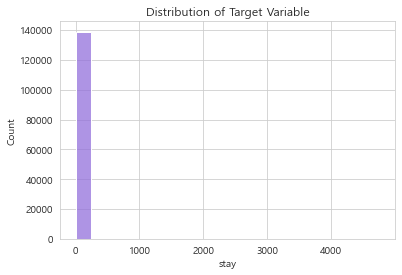

In [ ]:
sns.histplot(x='stay', data=injury, color='mediumpurple', bins=20)
plt.title('Distribution of Target Variable');

- 왼쪽으로 치우친 분포: 100일 이하인 분포만 확인

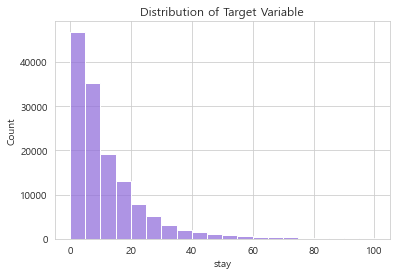

In [ ]:
temp = injury.loc[injury['stay']<=100,]
sns.histplot(x='stay', data=temp, color='mediumpurple', bins=20)
plt.title('Distribution of Target Variable');

- log transformation

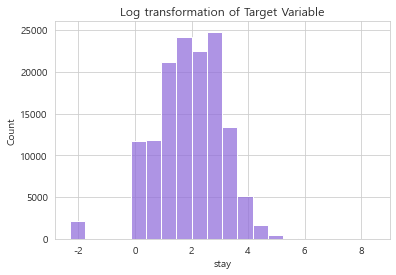

In [ ]:
temp = np.log(injury['stay']+0.1)
sns.histplot(x=temp, color='mediumpurple', bins=20)
plt.title('Log transformation of Target Variable');

#### Predictor variable

In [ ]:
injury.describe().T

,count,mean,std,min,25%,50%,75%,max
SEX,139001.0,1.443529e+00,4.968026e-01,1.0,1.0,1.0,2.0,2.0
AGE,139001.0,4.912575e+01,2.204268e+01,0.0,32.0,51.0,66.0,370.0
ZIP,139001.0,2.463539e+05,2.597618e+05,0.0,31909.0,61763.0,476852.0,999999.0
PAYSOU,139001.0,2.258257e+00,1.858933e+00,0.0,1.0,1.0,5.0,8.0
ADMROU,139001.0,1.468687e+00,5.690833e-01,1.0,1.0,1.0,2.0,9.0
PRIPRO,139001.0,4.586802e-01,4.982915e-01,0.0,0.0,0.0,1.0,1.0
TXRES,139001.0,1.089654e+00,4.950019e-01,1.0,1.0,1.0,1.0,9.0
DISPO,139001.0,1.119488e+00,5.857076e-01,1.0,1.0,1.0,1.0,9.0
INJINT,139001.0,8.971878e-02,4.990503e-01,0.0,0.0,0.0,0.0,9.0
INJPLA,139001.0,3.532408e+01,4.498594e+01,0.0,4.0,4.0,99.0,99.0


- numerical variables

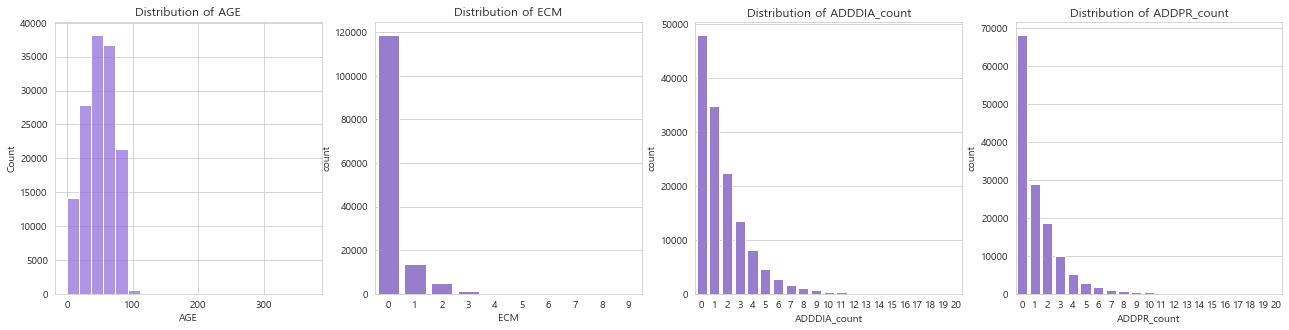

In [ ]:
# numerical features
fig = plt.figure(figsize=(22, 5))
for i in range(len(intcols)):
    plt.subplot(1, 4, i+1)
    if intcols[i] == 'AGE':
        sns.histplot(injury[intcols[i]],color="mediumpurple", bins=20)
        plt.title("Distribution of "+intcols[i]);
    else:
        sns.countplot(injury[intcols[i]],color="mediumpurple")
        plt.title("Distribution of "+intcols[i]);

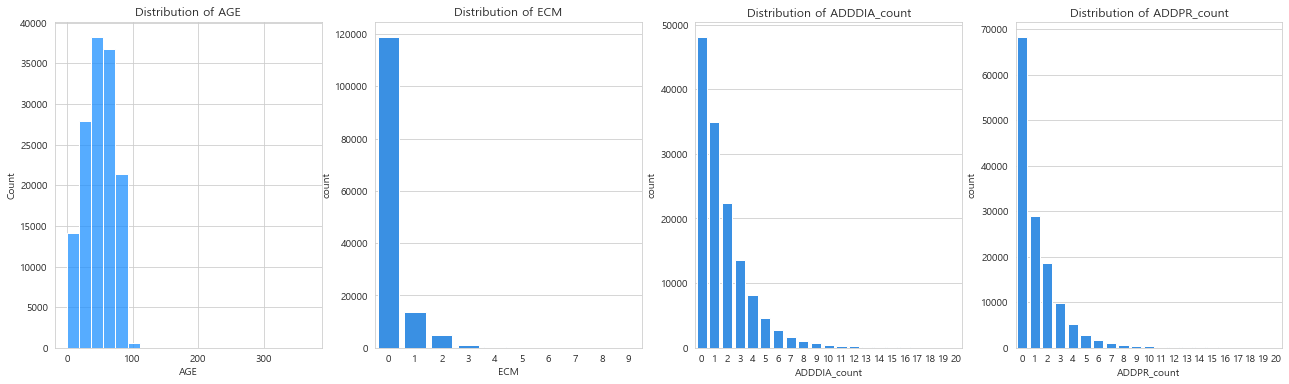

In [ ]:
# numerical features
fig = plt.figure(figsize=(22, 6))
for i in range(len(intcols)):
    plt.subplot(1, 4, i+1)
    if intcols[i] == 'AGE':
        sns.histplot(injury[intcols[i]],color="dodgerblue", bins=20)
        plt.title("Distribution of "+intcols[i]);
    else:
        sns.countplot(injury[intcols[i]],color="dodgerblue")
        plt.title("Distribution of "+intcols[i]);

- age 변수의 경우 값이 300까지 있음

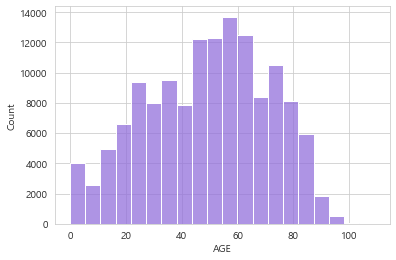

In [ ]:
temp = injury[injury['AGE'] <= 150]['AGE']
sns.histplot(temp,color="mediumpurple", bins=20);

- categorical variables

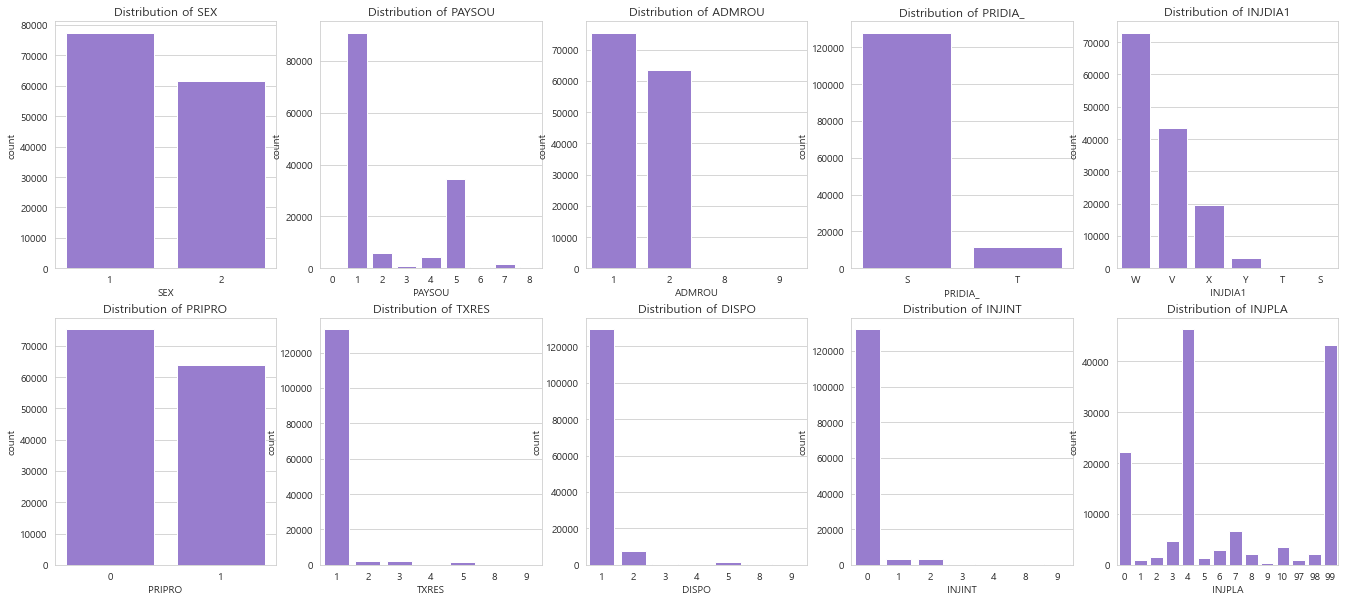

In [ ]:
# categorical features
fig = plt.figure(figsize=(23, 10))
for i in range(len(catcols[:10])):
    plt.subplot(2, 5, i+1)
    sns.countplot(injury[catcols[i]],color="mediumpurple")
    plt.title("Distribution of "+catcols[i]);

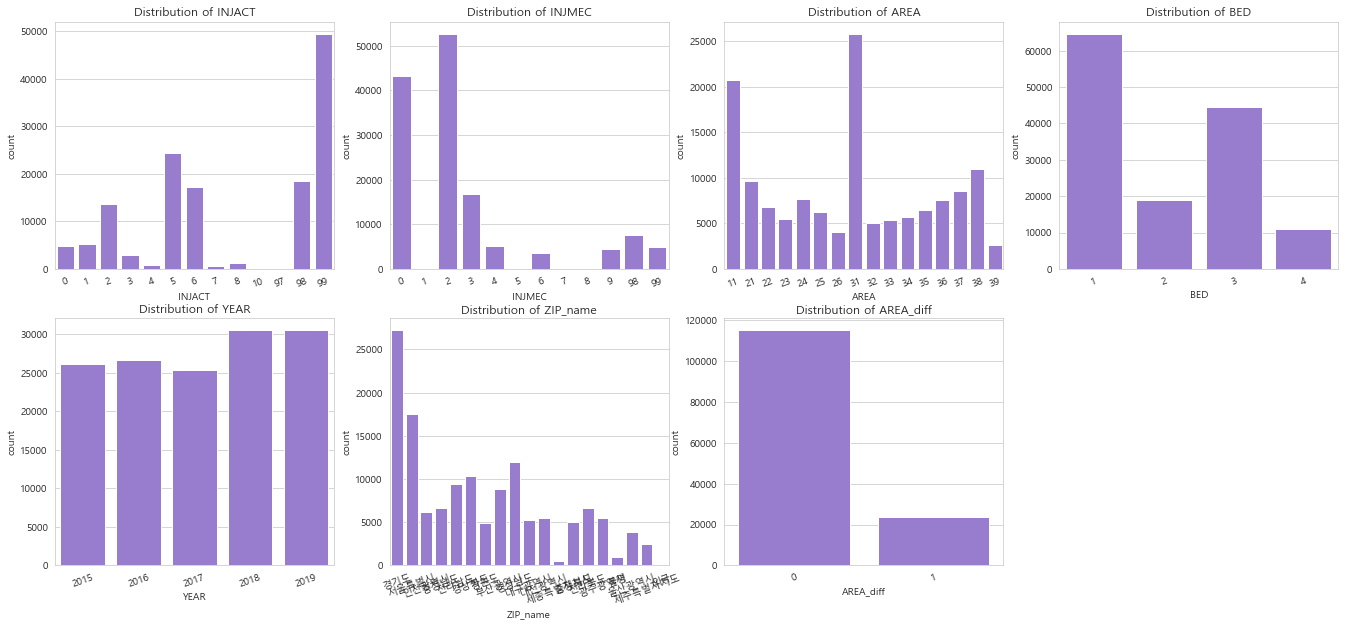

In [ ]:
# categorical features
fig = plt.figure(figsize=(23, 10))
for i in range(10, len(catcols)):
    plt.subplot(2, 4, i-9)
    sns.countplot(injury[catcols[i]],color="mediumpurple")
    plt.title("Distribution of "+catcols[i])
    plt.xticks(rotation=20);

#### predictor variable vs response variable

- numerical features

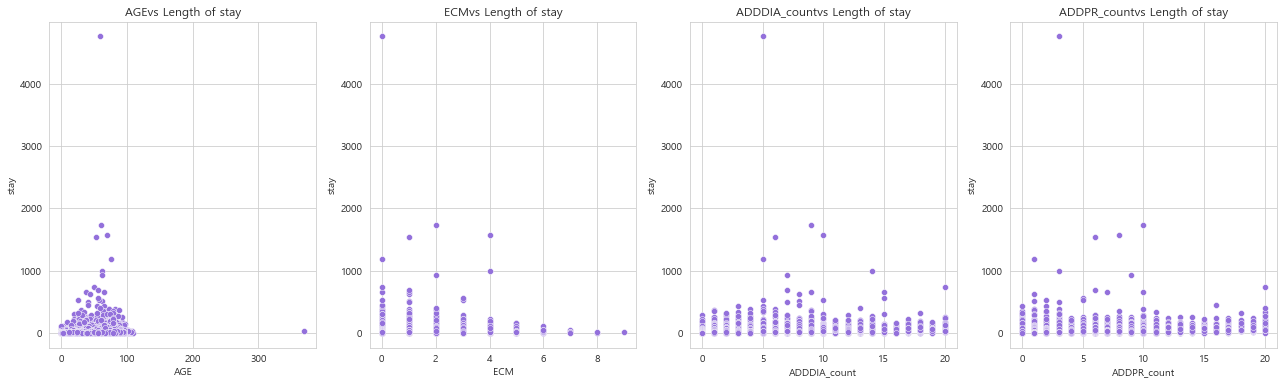

In [ ]:
# numerical features
fig = plt.figure(figsize=(22, 6))
for i in range(len(intcols)):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(x=intcols[i], y='stay', data=injury, color="mediumpurple")
    plt.title(intcols[i]+"vs Length of stay");

- categorical variables

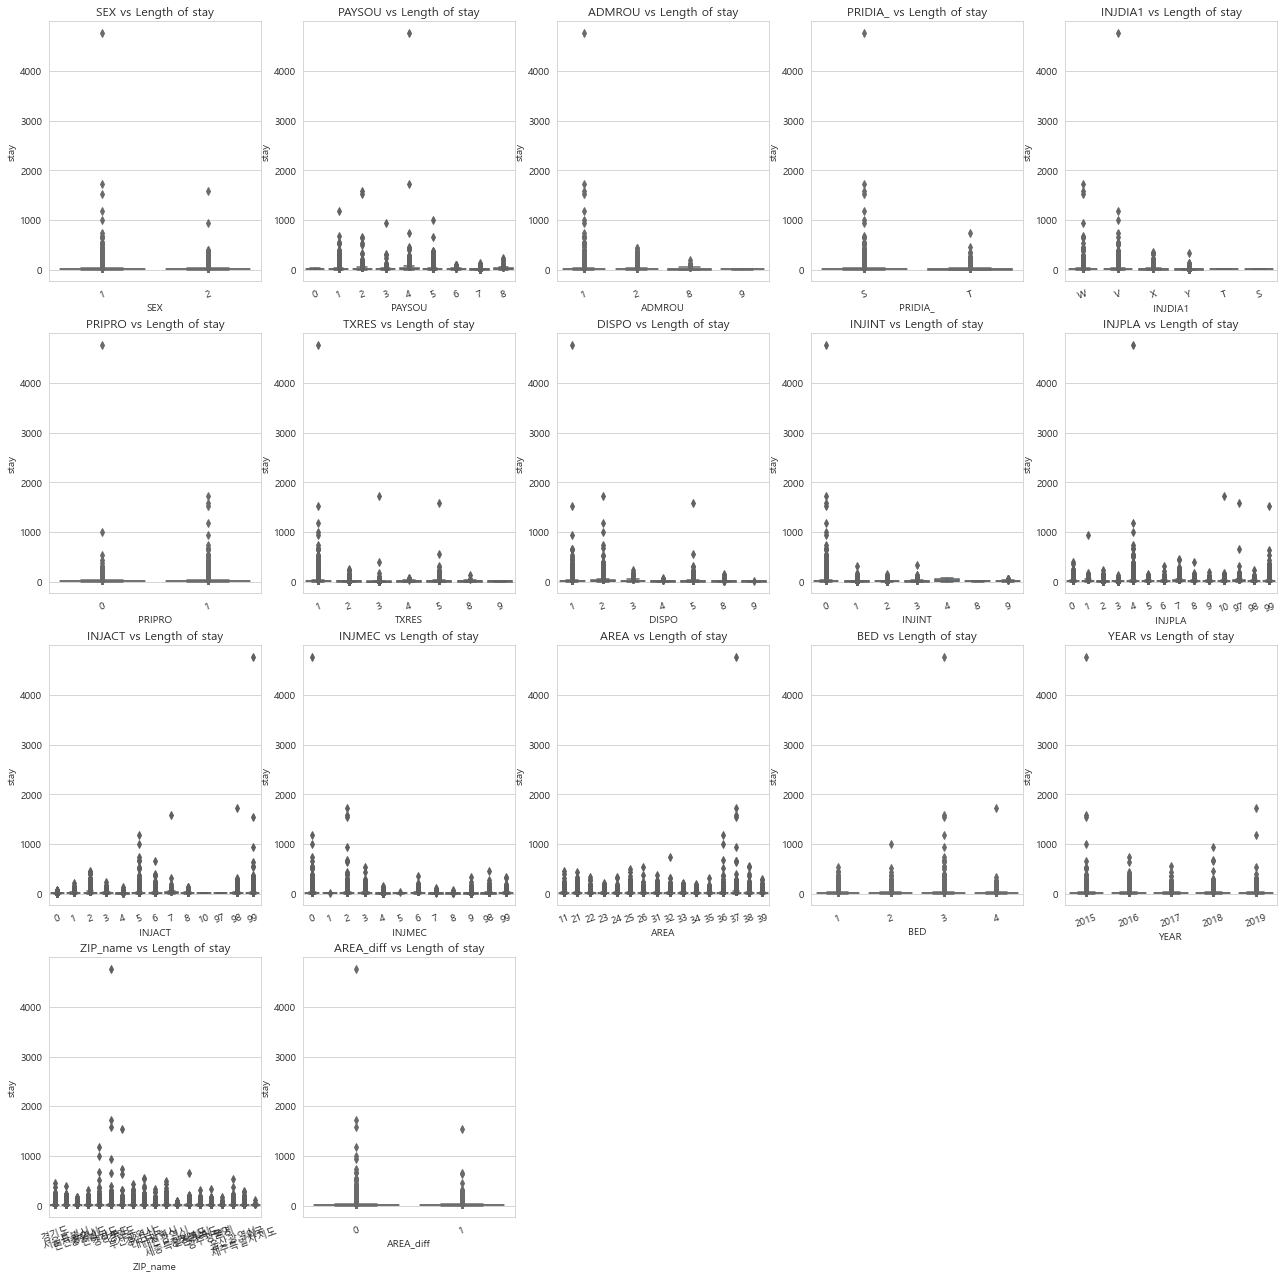

In [ ]:
# categorical features
fig = plt.figure(figsize=(22, 22))
for i in range(len(catcols)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=catcols[i], y='stay', data=injury, palette="Set3")
    plt.title(catcols[i]+" vs Length of stay")
    plt.xticks(rotation=20);

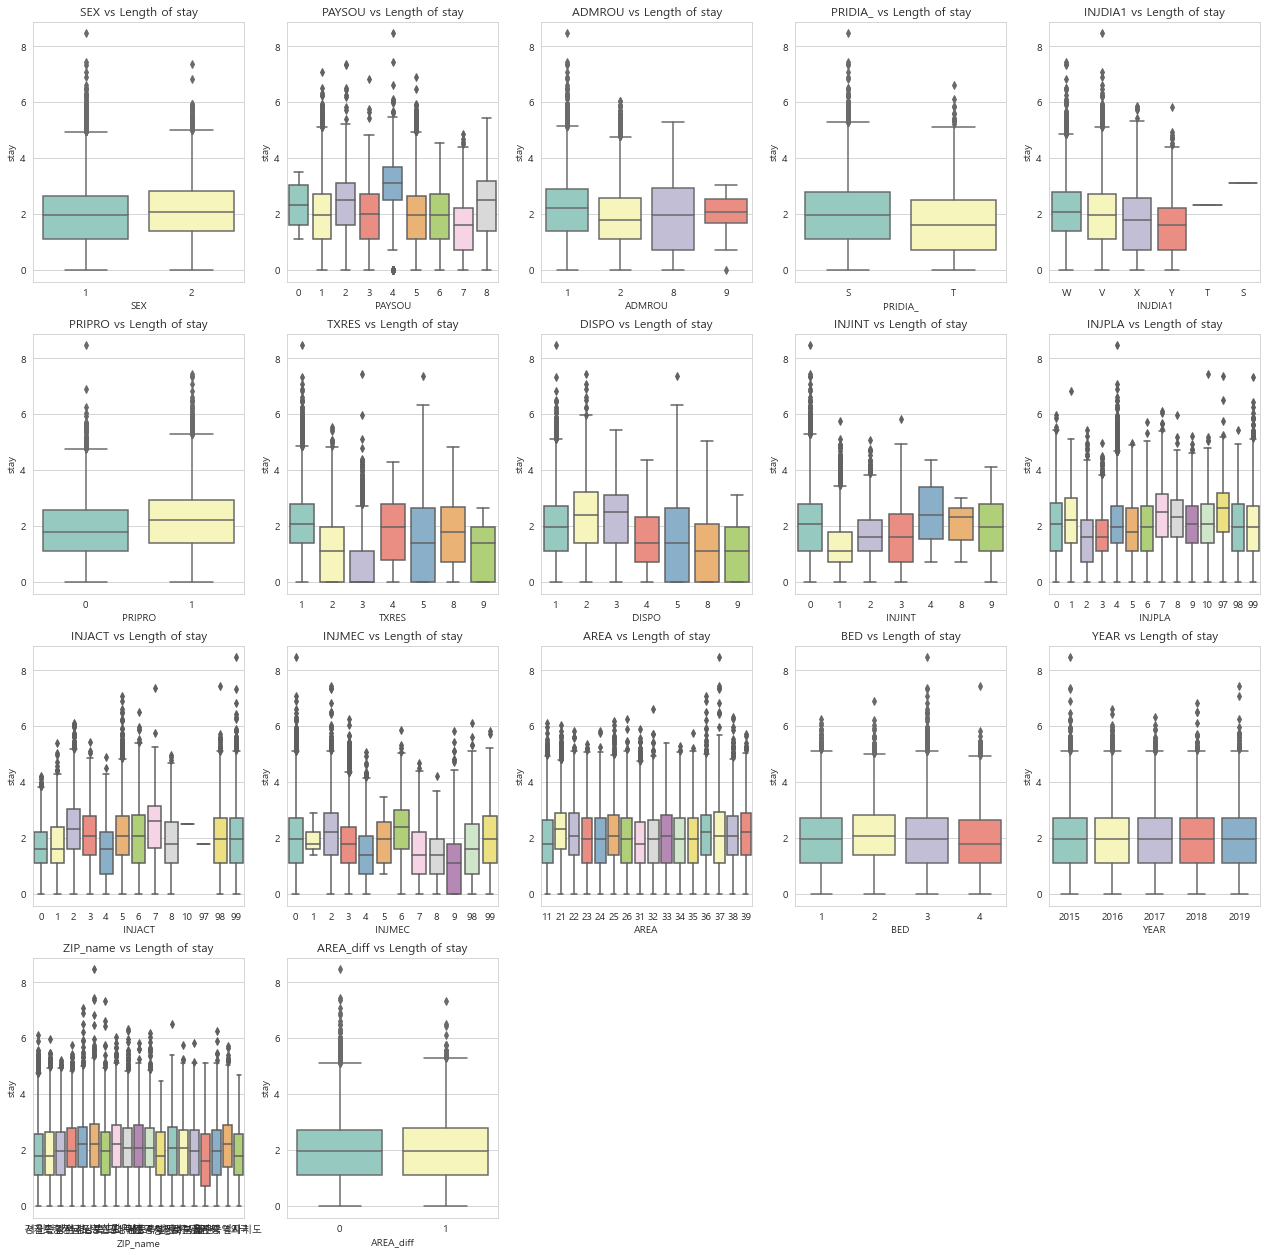

In [ ]:
# categorical features - with log(stay)
fig = plt.figure(figsize=(22, 22))
for i in range(len(catcols)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=catcols[i], y=np.log(injury['stay']), data=injury, palette="Set3")
    plt.title(catcols[i]+" vs Length of stay");

#### Correlation plot

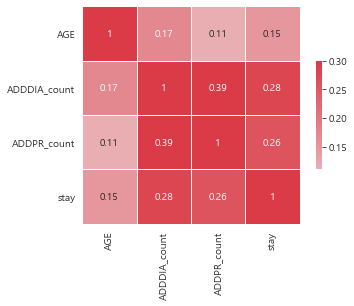

In [ ]:
cols = ['AGE','ADDDIA_count', 'ADDPR_count', 'stay']
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(injury[cols].corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## **3. EDA 후 전처리**

In [ ]:
def make_adm_inj(data):
    # 손상 후 입원소요일 변수 생성
    data['INJDATE_m'] = data['INJDATE'].astype("str").str[4:6].astype('int')
    data['INJDATE_d'] = data['INJDATE'].astype("str").str[6:].astype('int')
    data = data[(data['INJDATE_m'] <= 12) & (data['INJDATE_d'] <= 31)]
    data['INJDATE'] = pd.to_datetime(data['INJDATE'], format ='%Y%m%d')
    data['ADMDATE'] = pd.to_datetime(data['ADMDATE'])
    data['adm_inj'] = (data['ADMDATE'] - data['INJDATE']).dt.days
    data = data.drop(['INJDATE_m', 'INJDATE_d'], axis = 1)
    # 카테고리화
    data['adm_inj'] = np.where(data['adm_inj'] <= 0, 0, 
                               np.where(data['adm_inj'] == 1, 1, 
                               np.where((data['adm_inj'] == 2) | (data['adm_inj'] == 3), 2, 
                               np.where((data['adm_inj'] >= 4) & (data['adm_inj'] <= 7), 3, 4))))
    return data

def make_category(data):
    data['ZIP_name'] = np.where((data['ZIP_name'] == "경기도") | (data['ZIP_name'] == "서울특별시") | (data['ZIP_name'] == "인천광역시"), "수도권",
                                np.where(data['ZIP_name'] == "강원도", "강원도",
                                np.where((data['ZIP_name'] == "부산광역시") | (data['ZIP_name'] == "경상남도") | (data['ZIP_name'] == "경상북도") | (data['ZIP_name'] == "대구광역시") | (data['ZIP_name'] == "울산광역시"), "경상도",
                                np.where((data['ZIP_name'] == "전라남도") | (data['ZIP_name'] == "전라북도") | (data['ZIP_name'] == "광주광역시"), "전라도",
                                np.where((data['ZIP_name'] == "충청남도") | (data['ZIP_name'] == "충청북도") | (data['ZIP_name'] == "대전광역시") | (data['ZIP_name'] == "세종특별자치시"), "충청도",
                                np.where(data['ZIP_name'] == "제주특별자치도", "제주도",
                                np.where(data['ZIP_name'] == "외국", "외국", "불명"))))))) # 8개 카테고리로 축소
    data['INJINT'] = np.where(data['INJINT'] == 0, 0, 1) # 손상의도성 유무 (비의도성:0, 의도성:1)
    data['TXRES'] = np.where(data['TXRES'] == 1, 0, 1) # 치료결과 호전 유무 (호전:0, 비호전:1)
    data['ADMROU'] = np.where(data['ADMROU'] == 1, 0, np.where(data['ADMROU'] == 2, 1, 2)) # 입원경로 (응급:0, 외래:1, 기타:2)
    data['PRIDIA__'] = np.where(data['PRIDIA'].str[:2] == "S0", "S0",
                           np.where(data['PRIDIA'].str[:2] == "S1", "S1",
                           np.where(data['PRIDIA'].str[:2] == "S2", "S2",
                           np.where(data['PRIDIA'].str[:2] == "S3", "S3",
                           np.where(data['PRIDIA'].str[:2] == "S4", "S4",
                           np.where(data['PRIDIA'].str[:2] == "S5", "S5",
                           np.where(data['PRIDIA'].str[:2] == "S6", "S6",
                           np.where(data['PRIDIA'].str[:2] == "S7", "S7",
                           np.where(data['PRIDIA'].str[:2] == "S8", "S8",
                           np.where(data['PRIDIA'].str[:2] == "S9", "S9",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 0) & (data['PRIDIA'].str[1:3].astype('int') <= 7), "T0007",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 8) & (data['PRIDIA'].str[1:3].astype('int') <= 14), "T0814",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 15) & (data['PRIDIA'].str[1:3].astype('int') <= 19), "T1519",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 20) & (data['PRIDIA'].str[1:3].astype('int') <= 25), "T2025",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 26) & (data['PRIDIA'].str[1:3].astype('int') <= 28), "T2628",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 29) & (data['PRIDIA'].str[1:3].astype('int') <= 32), "T2932",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 33) & (data['PRIDIA'].str[1:3].astype('int') <= 35), "T3335",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 36) & (data['PRIDIA'].str[1:3].astype('int') <= 50), "T3650",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 51) & (data['PRIDIA'].str[1:3].astype('int') <= 65), "T5165",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 66) & (data['PRIDIA'].str[1:3].astype('int') <= 78), "T6678",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') == 79), "T79",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 80) & (data['PRIDIA'].str[1:3].astype('int') <= 88), "T8088",
                           np.where((data['PRIDIA_'] == 'T') & (data['PRIDIA'].str[1:3].astype('int') >= 90) & (data['PRIDIA'].str[1:3].astype('int') <= 98), "T9098", 0)))))))))))))))))))))))
    data['AREA_new'] = [0] * len(data)
    for i in range(len(data)):
        if data['AREA'][i]==31 or data['AREA'][i]==11 or data['AREA'][i]==23 :
            data['AREA_new'][i]="수도권"
        elif data['AREA'][i]==37 or data['AREA'][i]==38 or data['AREA'][i]==21 or data['AREA'][i]==22 or data['AREA'][i]==26:
            data['AREA_new'][i]="경상도"
        elif data['AREA'][i]==33 or data['AREA'][i]==34 or data['AREA'][i]==25 or  data['AREA'][i]==29:
            data['AREA_new'][i]="충청도"
        elif data['AREA'][i]==35 or data['AREA'][i]==36 or data['AREA'][i]==24:
            data['AREA_new'][i]="전라도"
        elif data['AREA'][i]==32:
            data['AREA_new'][i]="강원도"
        elif data['AREA'][i]==39:
            data['AREA_new'][i]="제주도"
    return data

def del_outlier(data):
    data = data[data['AGE'] <= 120]
    data = data.drop(data.loc[(data['INJDIA1'] == 'S') | (data['INJDIA1'] == 'T')].index, axis = 0)
    data = data[data['stay'] <= 2000] # 주진단코드 및 입원, 퇴원 정보를 봤을 때 기록 오류로 판단
    return data

def make_season(data):
    data['INJDATE'] = pd.to_datetime(data['INJDATE'], format = '%Y-%m-%d')
    month = data['INJDATE'].dt.month
    season = []
    for i in range(len(data)):
        if month[i] in [3, 4, 5]:
            season.append('spring')
        elif month[i] in [6, 7, 8]:
            season.append('summer')
        elif month[i] in [9, 10, 11]:
            season.append('fall')
        else:
            season.append('winter')
    data['season'] = season
    return data

In [ ]:
injury = make_adm_inj(injury)
injury = make_category(injury)
injury = del_outlier(injury)
injury = make_season(injury)

In [ ]:
# injury.to_csv("final.csv", index = False)

In [ ]:
final = injury.copy()

In [ ]:
injury = injury[injury['stay'] <= 90]

## **4. EDA**

#### AGE (나이)

In [ ]:
temp = final[final['stay'] <= 90]['AGE']
sns.histplot(temp,color = "hotpink", bins = 20)
plt.title("Distribution of AGE");

In [ ]:
df = injury.copy()
df["age_group"] = np.where(df["AGE"] >= 100, "over100",
                          np.where((df["AGE"] >= 90) & (df["AGE"] < 100), "90s",
                          np.where((df["AGE"] >= 80) & (df["AGE"] < 90), "80s",
                          np.where((df["AGE"] >= 70) & (df["AGE"] < 80), "70s",
                          np.where((df["AGE"] >= 60) & (df["AGE"] < 70), "60s",
                          np.where((df["AGE"] >= 50) & (df["AGE"] < 60), "50s",
                          np.where((df["AGE"] >= 40) & (df["AGE"] < 50), "40s",
                          np.where((df["AGE"] >= 30) & (df["AGE"] < 40), "30s",
                          np.where((df["AGE"] >= 20) & (df["AGE"] < 30), "20s",
                          np.where((df["AGE"] >= 10) & (df["AGE"] < 20), "10s", "0s"))))))))))
df[["AGE", "age_group"]].head(3)

In [ ]:
# 연령별 재원일수 그래프
plt.figure(figsize = (10,6))
sns.boxplot(x = "age_group", y = "stay", data = df[["age_group", "stay"]].sort_values(by = "age_group"), palette = "Set3")
plt.title("Box plot of AGE Group")
plt.show()

#### PRIDIA__ (주진단코드 분류)

In [ ]:
plt.figure(figsize = (10,6))
temp = final[final["stay"] <= 90]['PRIDIA__'].sort_values()
sns.histplot(temp, color="mediumpurple", bins=20)
plt.xticks(rotation = 90)
plt.title("Distribution of PRIDIA Group");

In [ ]:
# 주진단코드별 재원일수 그래프
plt.figure(figsize = (16,6))
sns.boxplot(x = "PRIDIA__", y = "stay", data = final[final["stay"] <= 90][["PRIDIA__", "stay"]].sort_values(by = "PRIDIA__"), palette = "Set3")
plt.xticks(rotation = 90)
plt.title("Box plot of PRIDIA Group")
plt.show()

#### PRIPRO (수술유무)

#### adm_inj (손상 후 입원소요일)

In [ ]:
fig = plt.figure(figsize = (6, 4))
ax = sns.countplot(x = injury['adm_inj'], color = "mediumpurple")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))
plt.title("손상 후 입원소요일 분포");

In [ ]:
# 손상 후 입원소요일별 재원일수 그래프
plt.figure(figsize = (6,4))
sns.boxplot(x = "adm_inj", y = "stay", data = injury, palette = "Set3")
plt.title("손상 후 입원소요일에 따른 재원일수 boxplot")
plt.show()

#### CCI(부진단 중증도 보정 변수)

In [ ]:
fig = plt.figure(figsize=(16, 5))
ax = sns.countplot(x=data['cci'], color="hotpink")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))
plt.title("CCI 분포");

In [ ]:
temp = data.groupby(['cci'], as_index=False).mean()
plt.figure(figsize = (10, 4))
sns.barplot(x='cci', y='stay', data=temp, palette='Purples')
plt.title("CCI에 따른 재원일수 평균");

In [ ]:
temp = data.groupby(['cci'], as_index=False)['PRIPRO'].mean()
plt.figure(figsize = (10, 4))
sns.barplot(x='cci', y='PRIPRO', data=temp, palette='Purples')
plt.title("CCI에 따른 수술 비율");

#### ECM(부진단 중증도 보정 변수)

In [ ]:
data = injury.copy()
fig = plt.figure(figsize=(12, 5))
ax = sns.countplot(x=data['ECM'], color="hotpink")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))
plt.title("ECM 분포");

In [ ]:
temp = data.groupby(['ECM'], as_index=False).mean()
sns.barplot(x='ECM', y='stay', data=temp, palette='Purples')
plt.title("ECM에 따른 재원일수 평균");

In [ ]:
temp = data.groupby(['ECM'], as_index=False)['PRIPRO'].mean()
sns.barplot(x='ECM', y='PRIPRO', data=temp, palette='Purples')
plt.title("ECM에 따른 수술 비율");

#### AREA_diff (거주지역과 병원지역 차이 유무)

In [ ]:
injury['AREA_diff'].value_counts()
total = 0
for i in range(2):
    total += injury['AREA_diff'].value_counts()[i]

print("입원환자의 거주 지역과 병원의 지역이 같은 비율 :", round(injury['AREA_diff'].value_counts()[0]/total, 2))
print("입원환자의 거주 지역과 병원의 지역이 다른 비율 :", round(injury['AREA_diff'].value_counts()[1]/total, 2))

In [ ]:
# 파이 차트 - 입원환자의 거주지역과 병원지역의 차이 유무
ratio = [round(injury['AREA_diff'].value_counts()[0]/total, 2),round(injury['AREA_diff'].value_counts()[1]/total, 2)]
labels = ['거주지역=병원지역', '거주지역≠병원지역']
explode = [0.05, 0.05]
colors = ['lightgrey', 'firebrick']

plt.figure(figsize = (15, 8))
plt.pie(ratio, labels = labels, 
        autopct = '%.1f%%', 
        startangle = 260, 
        counterclock = False, 
        explode = explode, 
        shadow = True, 
        colors = colors, 
        textprops = {"fontsize":15})
plt.title("입원환자의 거주지역과 병원지역의 차이 유무", fontsize = 18)
plt.show()

In [ ]:
# (1) 거주지역≠병원지역 중 실제 거주지역 비율
diff = injury[injury['AREA_diff'] == 1]
count = diff['ZIP_name'].value_counts()
count

In [ ]:
series = pd.Series([8198, 5224, 4671, 3219, 886, 607, 154, 94],
                   index = ['수도권', '경상도', '충청도', '전라도', '불명', '강원도', '외국', '제주도'])
colors = ['dodgerblue', 'hotpink', 'mediumpurple', 'lightgray', 'gray', 'dimgray', 'dimgray', 'dimgray']
explode = pd.Series([0.1, 0, 0, 0, 0, 0, 0, 0], index = series.index)

plt.figure(figsize = (20, 10))
plt.pie(series, labels = series.index,
        autopct = '%.1f%%',
        colors = colors,
        explode = explode,
        shadow = True, 
        textprops = {"fontsize":15})
plt.title("거주지역≠병원지역의 분포", fontsize = 18)
plt.show()

In [ ]:
# (2) 지역별 인구를 고려한 거주지역≠병원지역의 분포 (1000 단위)

# 2020 기준 통계청 자료
sudo = 13405 + 9602 + 2951
gyeong = 3350 + 2655 + 3344 + 2419 + 1140
chung = 2204 + 1632 + 1500 + 349
jeon = 1764 + 1792 + 1488
gang = 1515
jeju = 670

series = pd.Series([8198/sudo*1000, 5224/gyeong*1000, 4671/chung*1000, 3219/jeon*1000, 607/gang*1000, 94/jeju*1000],
                   index = ['수도권', '경상도', '충청도', '전라도', '강원도', '제주도'])
colors = ['dodgerblue', 'hotpink', 'mediumpurple', 'lightgray', 'gray', 'dimgray']
explode = pd.Series([0, 0, 0.1, 0, 0, 0], index = series.values)

plt.figure(figsize = (20, 10))
plt.pie(series, labels = series.index,
        autopct = '%.1f'+'명',
        colors = colors,
        explode = explode,
        shadow = True,
        startangle = 90, 
        textprops = {"fontsize":15})
plt.title("지역별 인구를 고려한 거주지역≠병원지역의 분포 (1000 단위)", fontsize = 18)
plt.show()

In [ ]:
# (3) 충청도가 거주지역인 사람들이 이용한 타지역 병원 위치 비율
use = diff[diff['ZIP_name'] == '충청도']
use['AREA'].value_counts()

In [ ]:
series = pd.Series([1618, 775, 530, 510, 470],
                   index = ['대전광역시', '충청북도', '경기도', '충청남도', '서울특별시'])
colors = ['dodgerblue', 'lightgray', 'gray', 'dimgray', 'dimgrey']
explode = pd.Series([0.1, 0, 0, 0, 0], index = series.index)
plt.figure(figsize = (20, 10))
plt.pie(series, labels = series.index,
        autopct = '%.1f%%',
        colors = colors,
        explode = explode,
        shadow = True,
        startangle = 90, 
        textprops = {"fontsize":15})
plt.title("충청도가 거주지역인 사람들이 이용한 타지역 병원 위치 비율", fontsize = 18)
plt.show()

#### season (계절)

In [ ]:
sns.countplot(x = 'season', data = injury, color = "hotpink")
plt.title("Distribution of season");

In [ ]:
sns.boxplot(x = 'season', y = 'stay', data = injury, color = "hotpink", palette = "Set3")
plt.title("season vs stay");

In [ ]:
sns.kdeplot(x = 'stay', data = injury, hue = 'season', color = "hotpink", palette = "Set3")
plt.title("season vs stay");